In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib import rc, rcParams
from dataclasses import dataclass

In [7]:
# w = wanted traffic, nw = non wanted traffic, c = clients

@dataclass
class Params:
    title : str
    ppsv : str
    ppsi : str
    clients : str

# Fail2ban Baseline
fail2ban_v10k_iv10k_c1016 = pd.read_csv('fail2ban_v10k_iv10k_c1016.csv',sep=';')
fail2ban_v50k_iv1m_c254 = pd.read_csv('fail2ban_v50k_iv1m_c254.csv',sep=';')

# Simplefail2ban Disk
simplefail2ban_disk_ip4_v10k_iv100k_c65534 = pd.read_csv('simplefail2ban_disk_ip4_v10k_iv100k_c65534.csv',sep=';')
simplefail2ban_disk_ip4_v10k_iv1m_c65534 = pd.read_csv('simplefail2ban_disk_ip4_v10k_iv1m_c65534.csv',sep=';')
simplefail2ban_disk_ip4_v10k_iv10m_c65534 = pd.read_csv('simplefail2ban_disk_ip4_v10k_iv10m_c65534.csv',sep=';')
simplefail2ban_disk_ip6_v10k_iv100k_c65534 = pd.read_csv('simplefail2ban_disk_ip6_v10k_iv100k_c65534.csv',sep=';')
simplefail2ban_disk_ip6_v10k_iv1m_c65534 = pd.read_csv('simplefail2ban_disk_ip6_v10k_iv1m_c65534.csv',sep=';')
simplefail2ban_disk_ip6_v10k_iv10m_c65534 = pd.read_csv('simplefail2ban_disk_ip6_v10k_iv10m_c65534.csv',sep=';')
simplefail2ban_disk_ip46_v10k_iv100k_c131086 = pd.read_csv('simplefail2ban_disk_ip46_v10k_iv100k_c131086.csv',sep=';')
simplefail2ban_disk_ip46_v10k_iv1m_c131086 = pd.read_csv('simplefail2ban_disk_ip46_v10k_iv1m_c131086.csv',sep=';')
simplefail2ban_disk_ip46_v10k_iv10m_c131086 = pd.read_csv('simplefail2ban_disk_ip46_v10k_iv10m_c131086.csv',sep=';')

paths_fail2ban = {
            'fail2ban_v10k_iv10k_c1016.csv' : Params('Fail2ban IPv4',"10k","10k","1016"),
            'fail2ban_v50k_iv1m_c254.csv' : Params('Fail2ban IPv4',"10k","1m","254"),
            }

paths_simplefail2ban_disk = {
         'simplefail2ban_disk_ip4_v10k_iv100k_c65534.csv' : Params('Simplefail2ban Disk IPv4',"10k","100k","65534"),
         'simplefail2ban_disk_ip4_v10k_iv1m_c65534.csv' : Params('Simplefail2ban Disk IPv4',"10k","1m","65534"),
         'simplefail2ban_disk_ip4_v10k_iv10m_c65534.csv' : Params('Simplefail2ban Disk IPv4',"10k","10m","65534"),
         'simplefail2ban_disk_ip6_v10k_iv100k_c65534.csv' : Params('Simplefail2ban Disk IPv6',"10k","100k","65534"),
         'simplefail2ban_disk_ip6_v10k_iv1m_c65534.csv' : Params('Simplefail2ban Disk IPv6',"10k","1m","65534"),
         'simplefail2ban_disk_ip6_v10k_iv10m_c65534.csv' : Params('Simplefail2ban Disk IPv6',"10k","10m","65534"),
         'simplefail2ban_disk_ip46_v10k_iv100k_c131086.csv' : Params('Simplefail2ban Disk IPv4 and IPv6',"10k","100k","131086"),
         'simplefail2ban_disk_ip46_v10k_iv1m_c131086.csv' : Params('Simplefail2ban Disk IPv4 and IPv6',"10k","1m","131086"),
         'simplefail2ban_disk_ip46_v10k_iv10m_c131086.csv' : Params('Simplefail2ban Disk IPv4 and IPv6',"10k","10m","131086"),
        }

paths_simplefail2ban_shm = {
         'simplefail2ban_shm_ip4_v10k_iv100k_c65534.csv' : Params('Simplefail2ban Shared Memory IPv4',"10k","100k","65534"),
         'simplefail2ban_shm_ip4_v10k_iv1m_c65534.csv' : Params('Simplefail2ban Shared Memory IPv4',"10k","1m","65534"),
         'simplefail2ban_shm_ip4_v10k_iv10m_c65534.csv' : Params('Simplefail2ban Shared Memory IPv4',"10k","10m","65534"),
         'simplefail2ban_shm_ip6_v10k_iv100k_c65534.csv' : Params('Simplefail2ban Shared Memory IPv6',"10k","100k","65534"),
         'simplefail2ban_shm_ip6_v10k_iv1m_c65534.csv' : Params('Simplefail2ban Shared Memory IPv6',"10k","1m","65534"),
         'simplefail2ban_shm_ip6_v10k_iv10m_c65534.csv' : Params('Simplefail2ban Shared Memory IPv6',"10k","10m","65534"),
         'simplefail2ban_shm_ip46_v10k_iv100k_c131086.csv' : Params('Simplefail2ban Shared Memory IPv4 and IPv6',"10k","100k","131086"),
         'simplefail2ban_shm_ip46_v10k_iv1m_c131086.csv' : Params('Simplefail2ban Shared Memory IPv4 and IPv6',"10k","1m","131086"),
         'simplefail2ban_shm_ip46_v10k_iv10m_c131086.csv' : Params('Simplefail2ban Shared Memory IPv4 and IPv6',"10k","10m","131086"),
}

def make_time_graph(paths):

    for path, params in paths.items():

        df = pd.read_csv(path,sep=';')

        df_drop = df[df['XDP_action'] == 'XDP_DROP']
        df_pass = df[df['XDP_action'] == 'XDP_PASS']

        fig = plt.figure()
        fig.set_figwidth(20)
        fig.set_figheight(12)
        f_size=20
        rc('text', usetex=True)
        rc('axes', linewidth=1)
        rc('font', weight='bold')
        rc('xtick', labelsize=f_size) 
        rc('ytick', labelsize=f_size) 

        plt.plot(df_pass['time'],df_pass['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
        plt.plot(df_pass['time'],df_drop['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

        title = f'{params.title}: {params.ppsv} valid pps, {params.ppsi} invalid pps, {params.clients} clients'

        plt.legend(fontsize=f_size, loc='upper right')
        plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
        plt.ylabel(r'\textbf{Pakets per second}',fontsize=f_size)
        plt.title(rf'\textbf{{{title}}}',fontsize=f_size)
        plt.grid(axis='y')
        plt.savefig(path.replace('.csv','.png'))


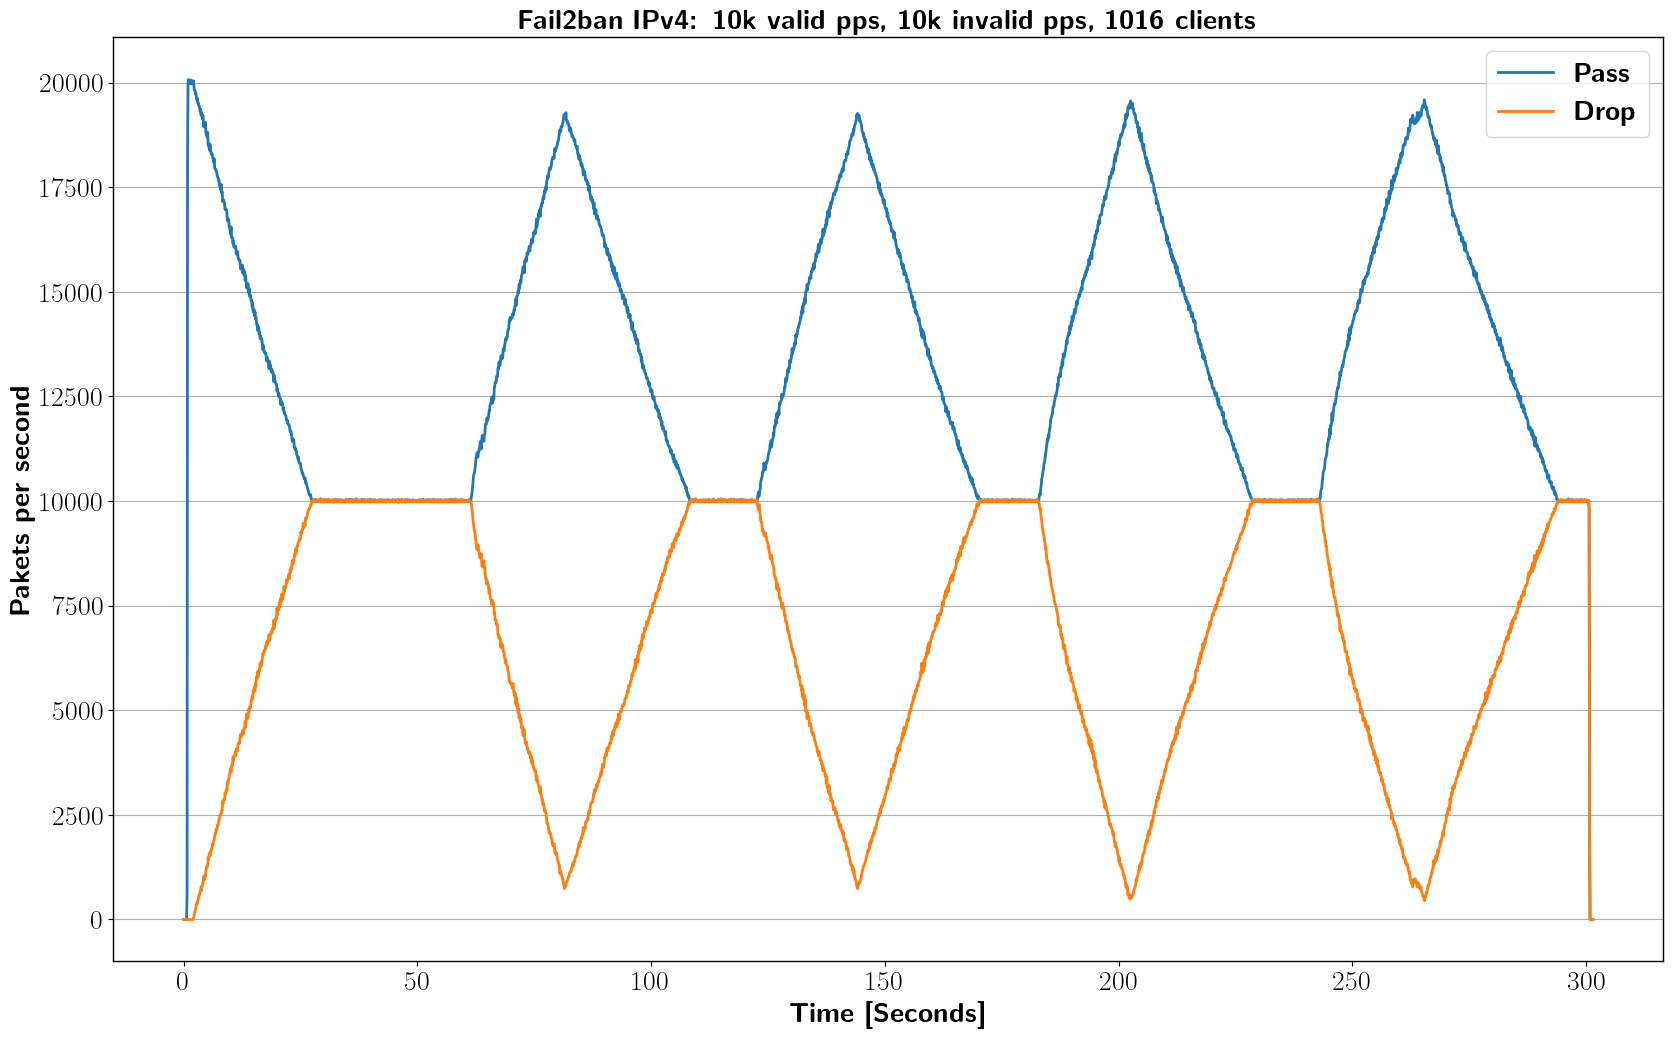

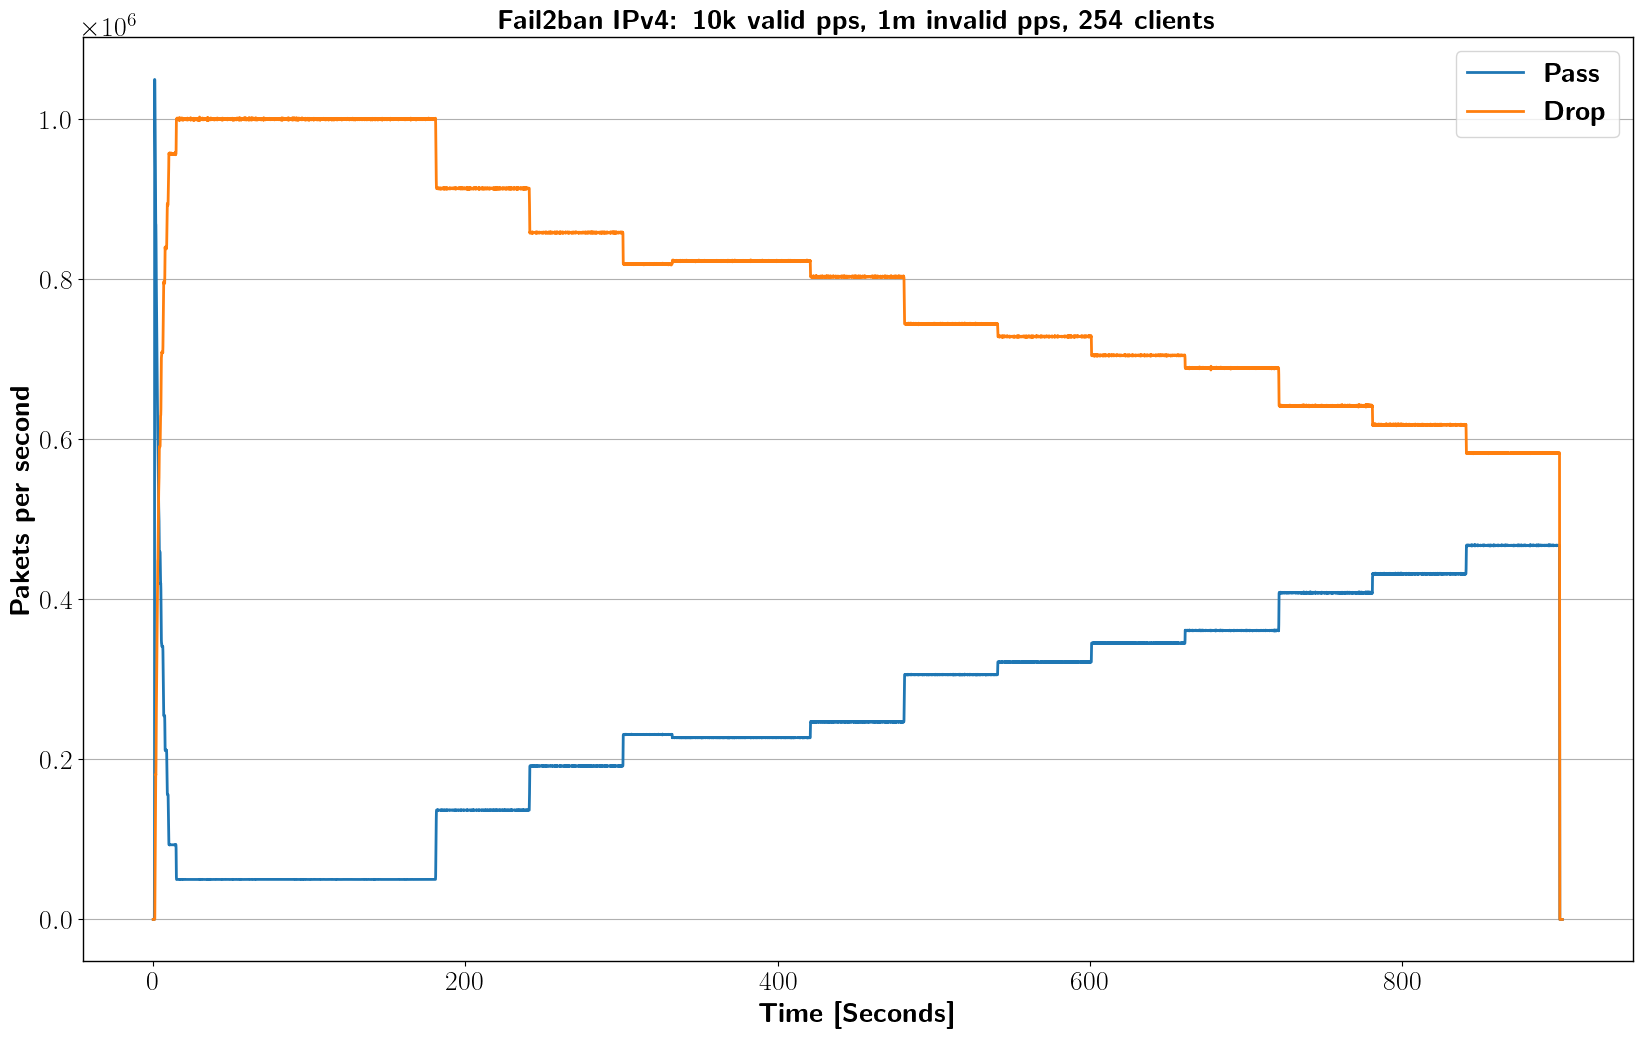

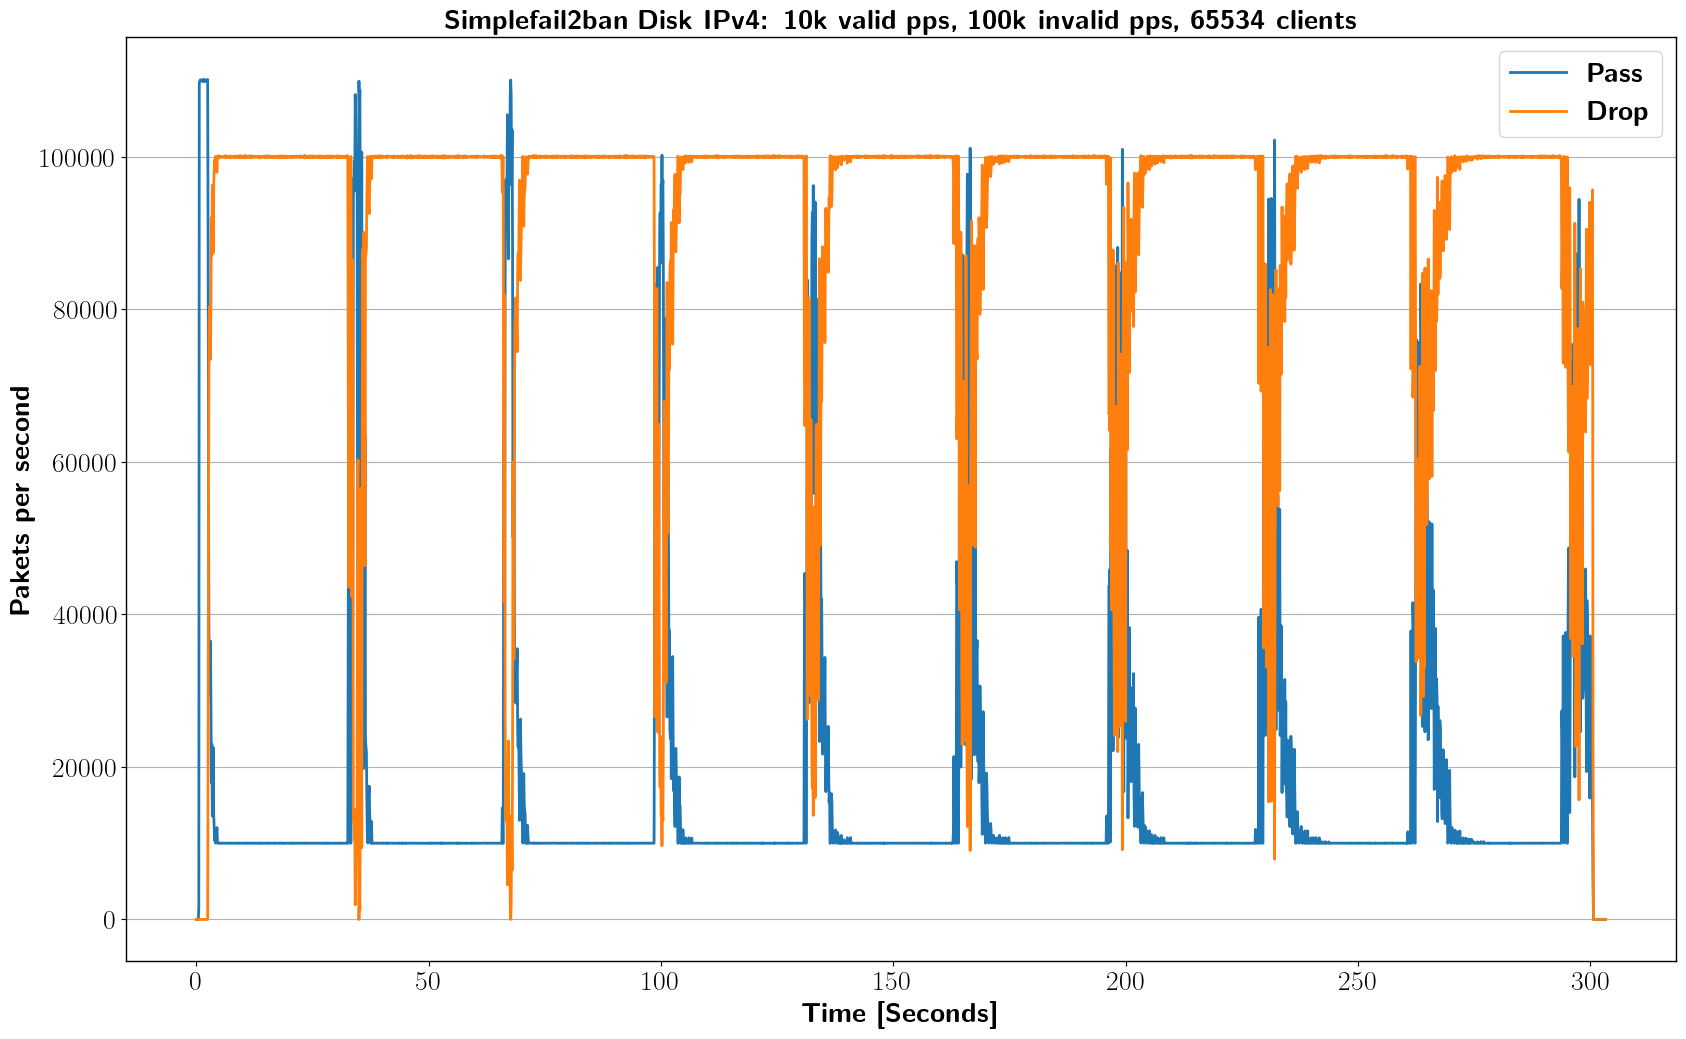

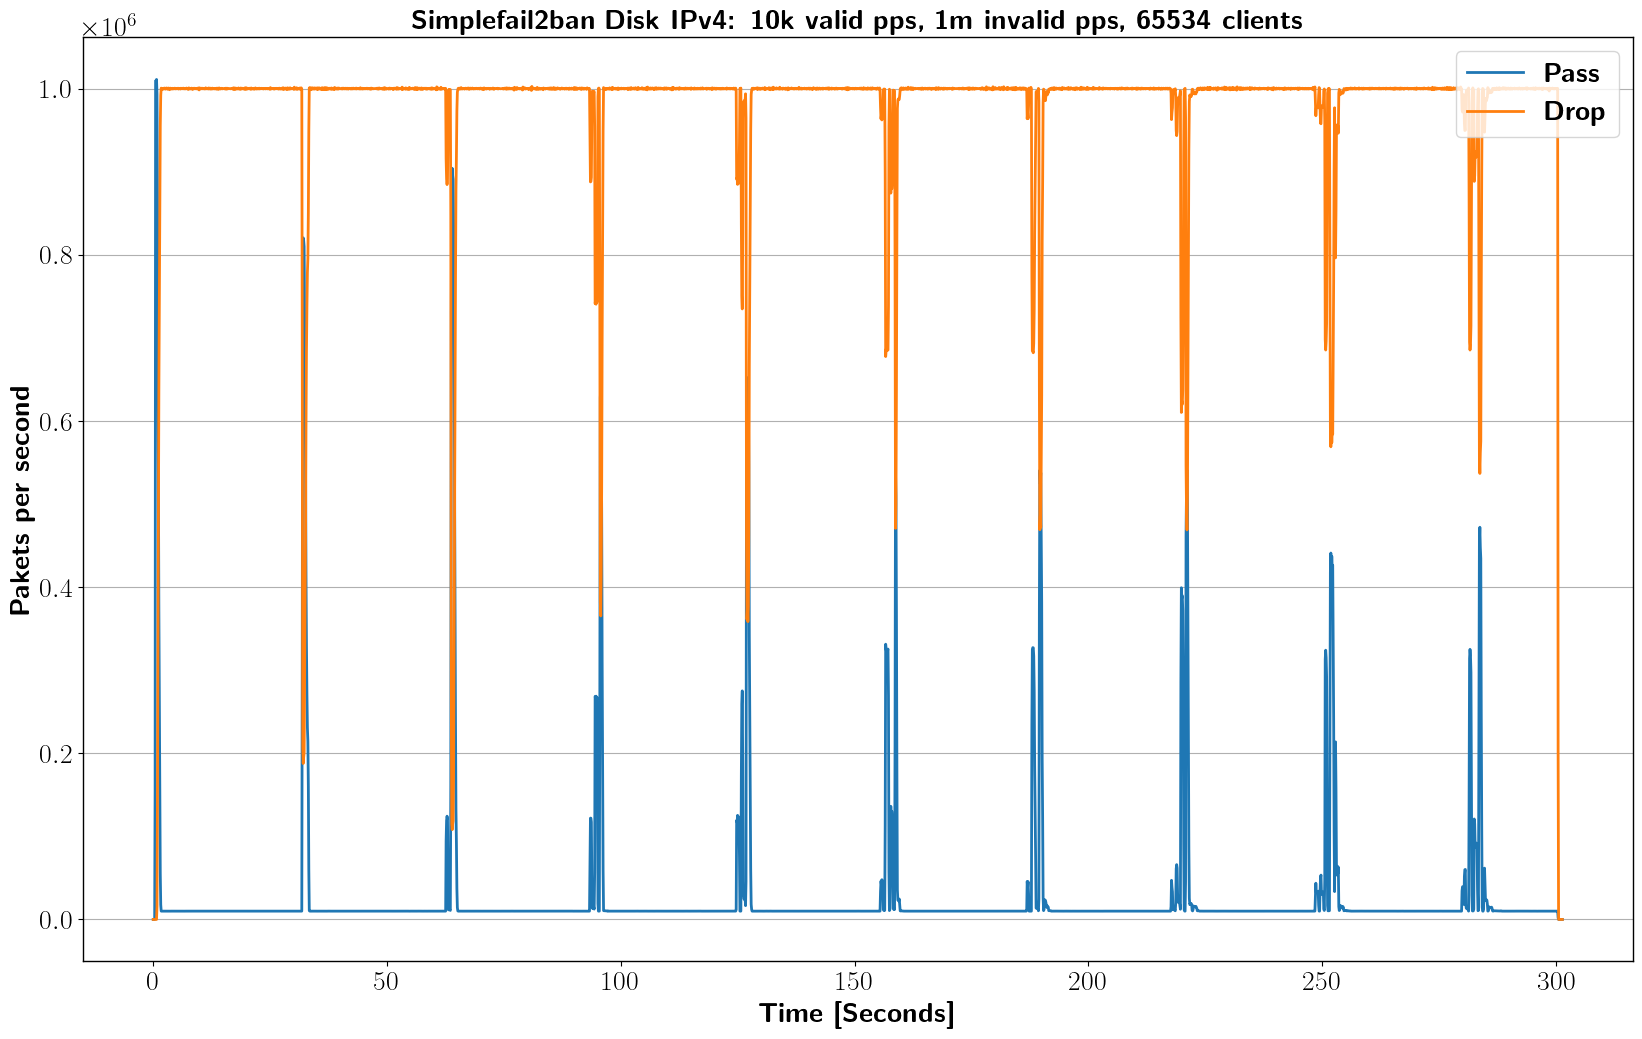

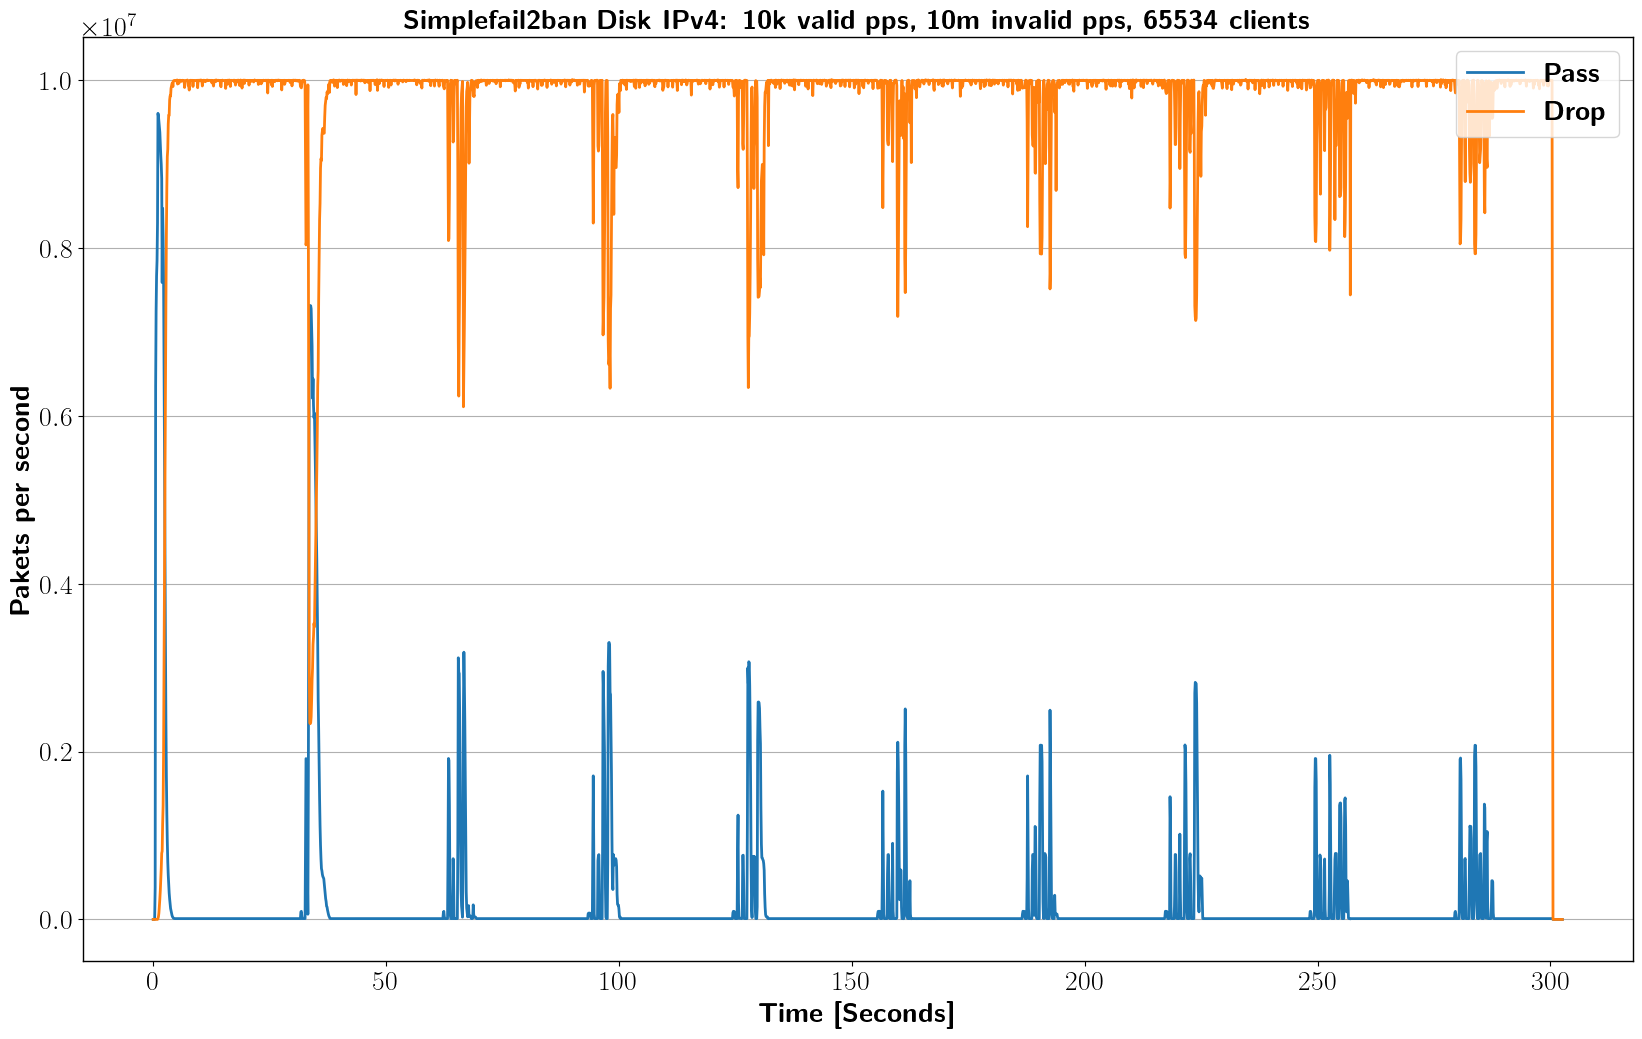

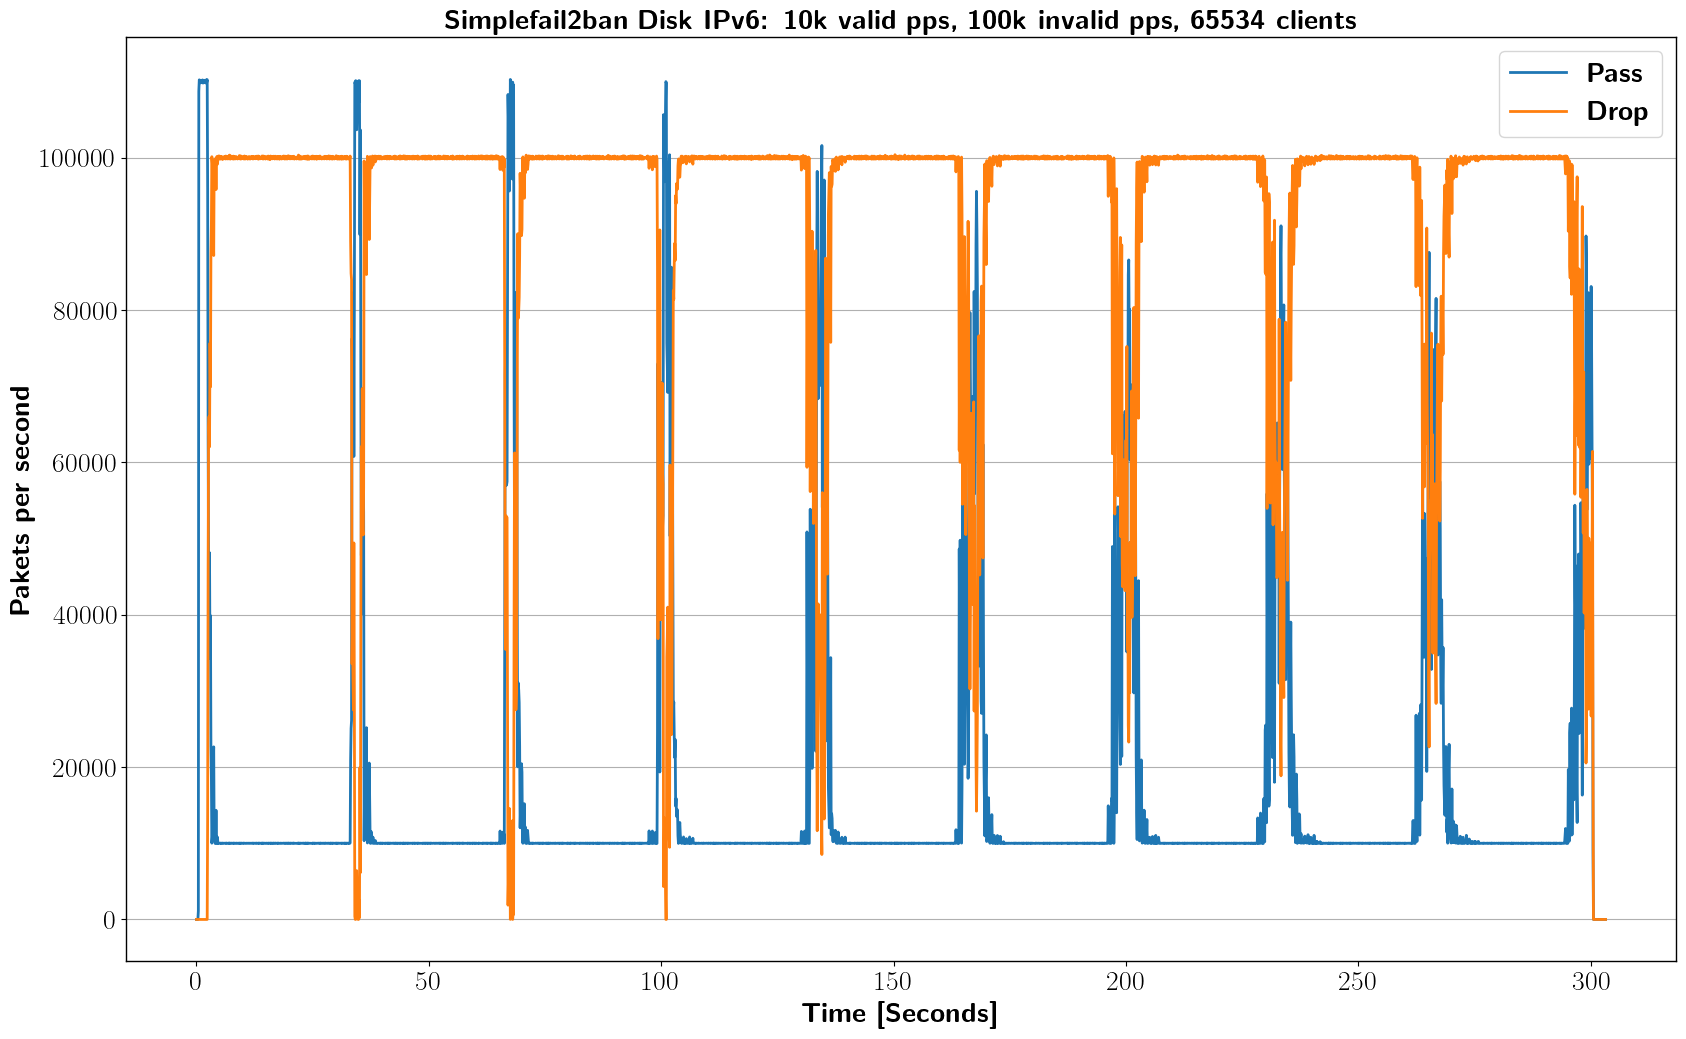

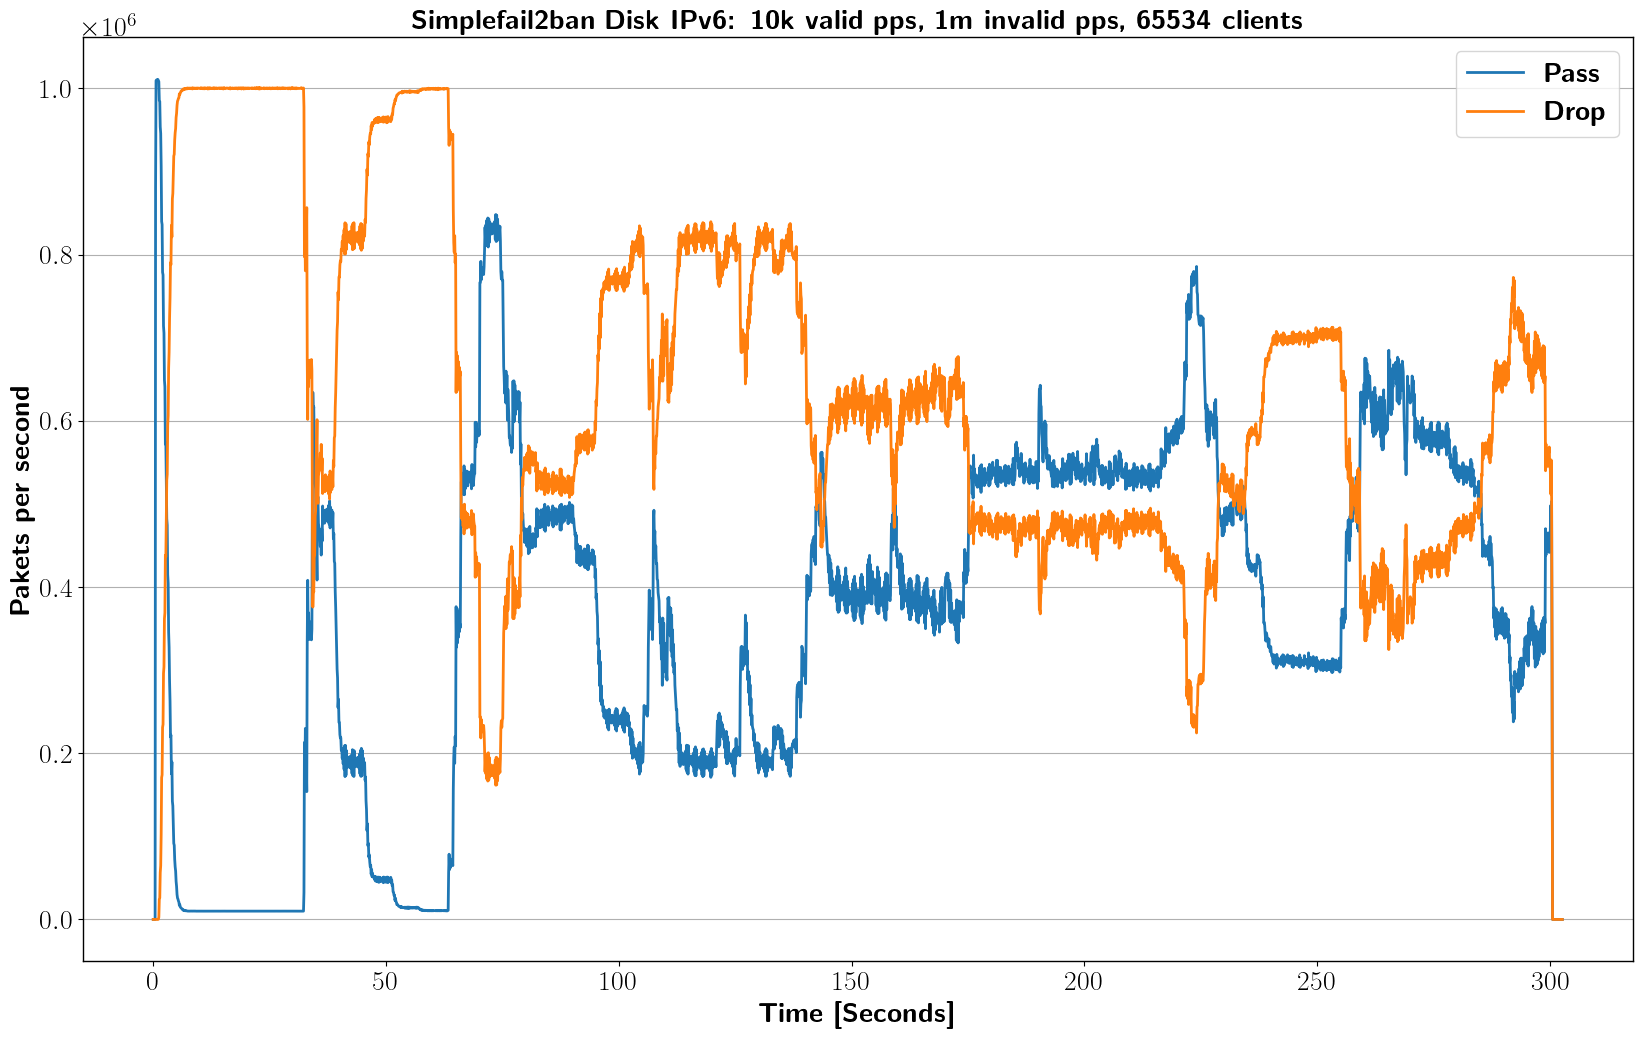

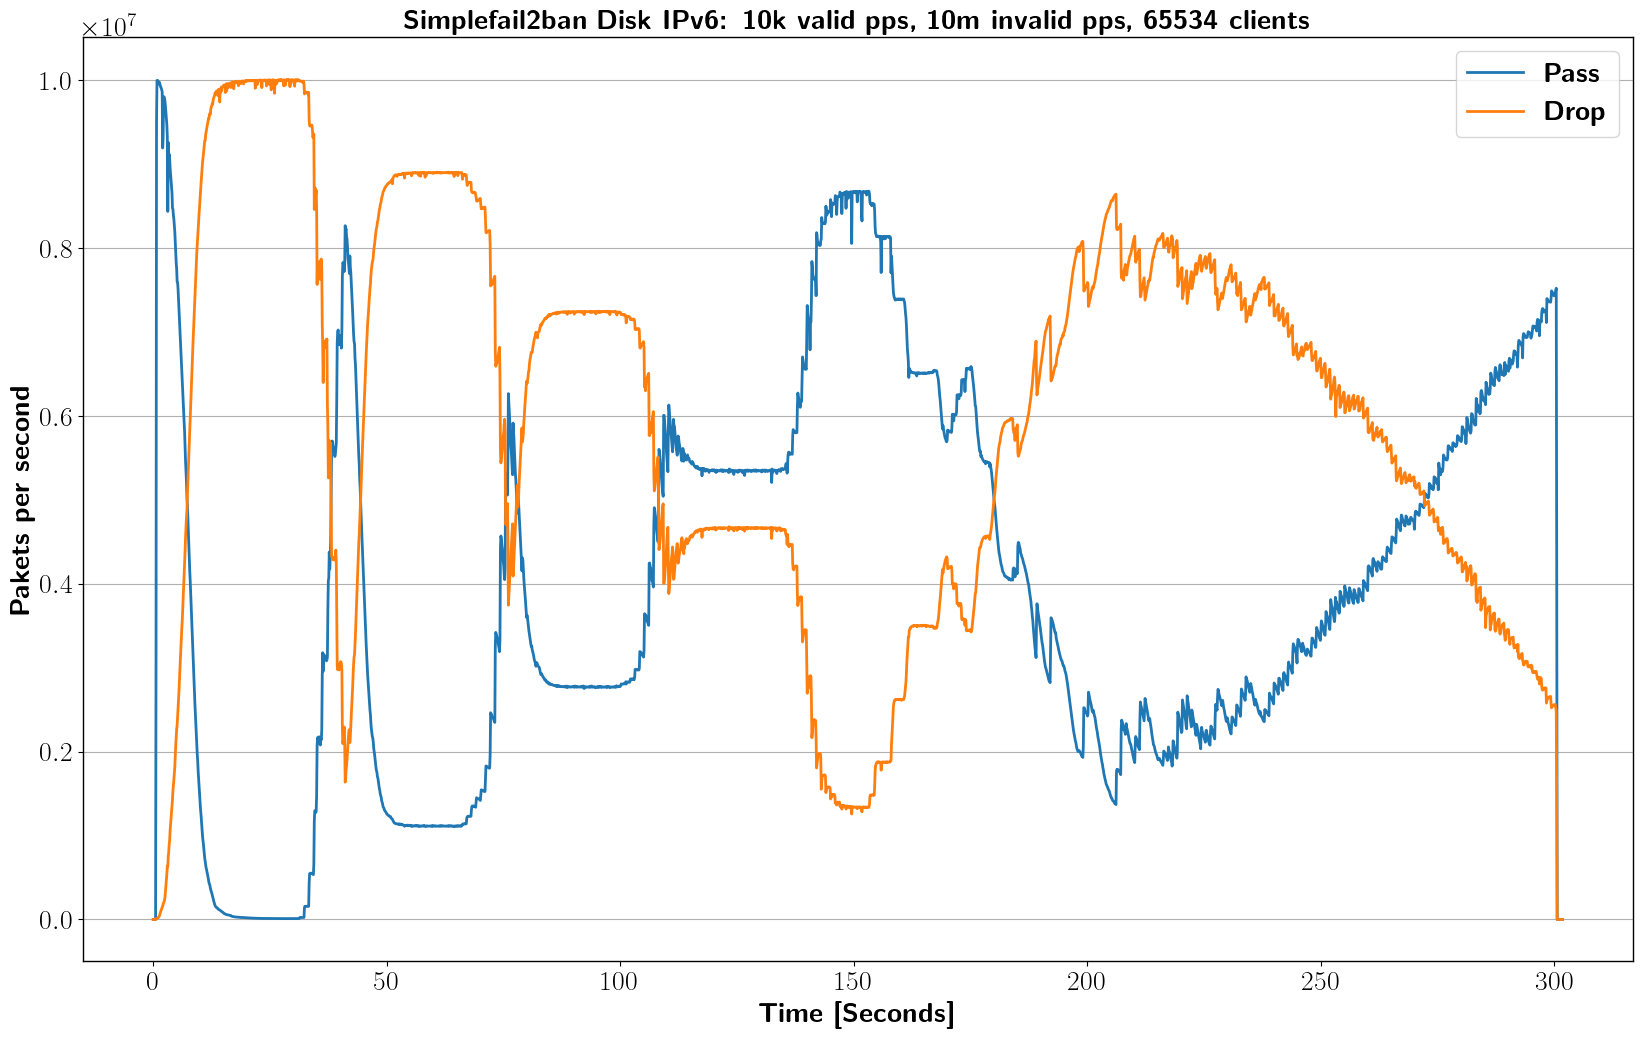

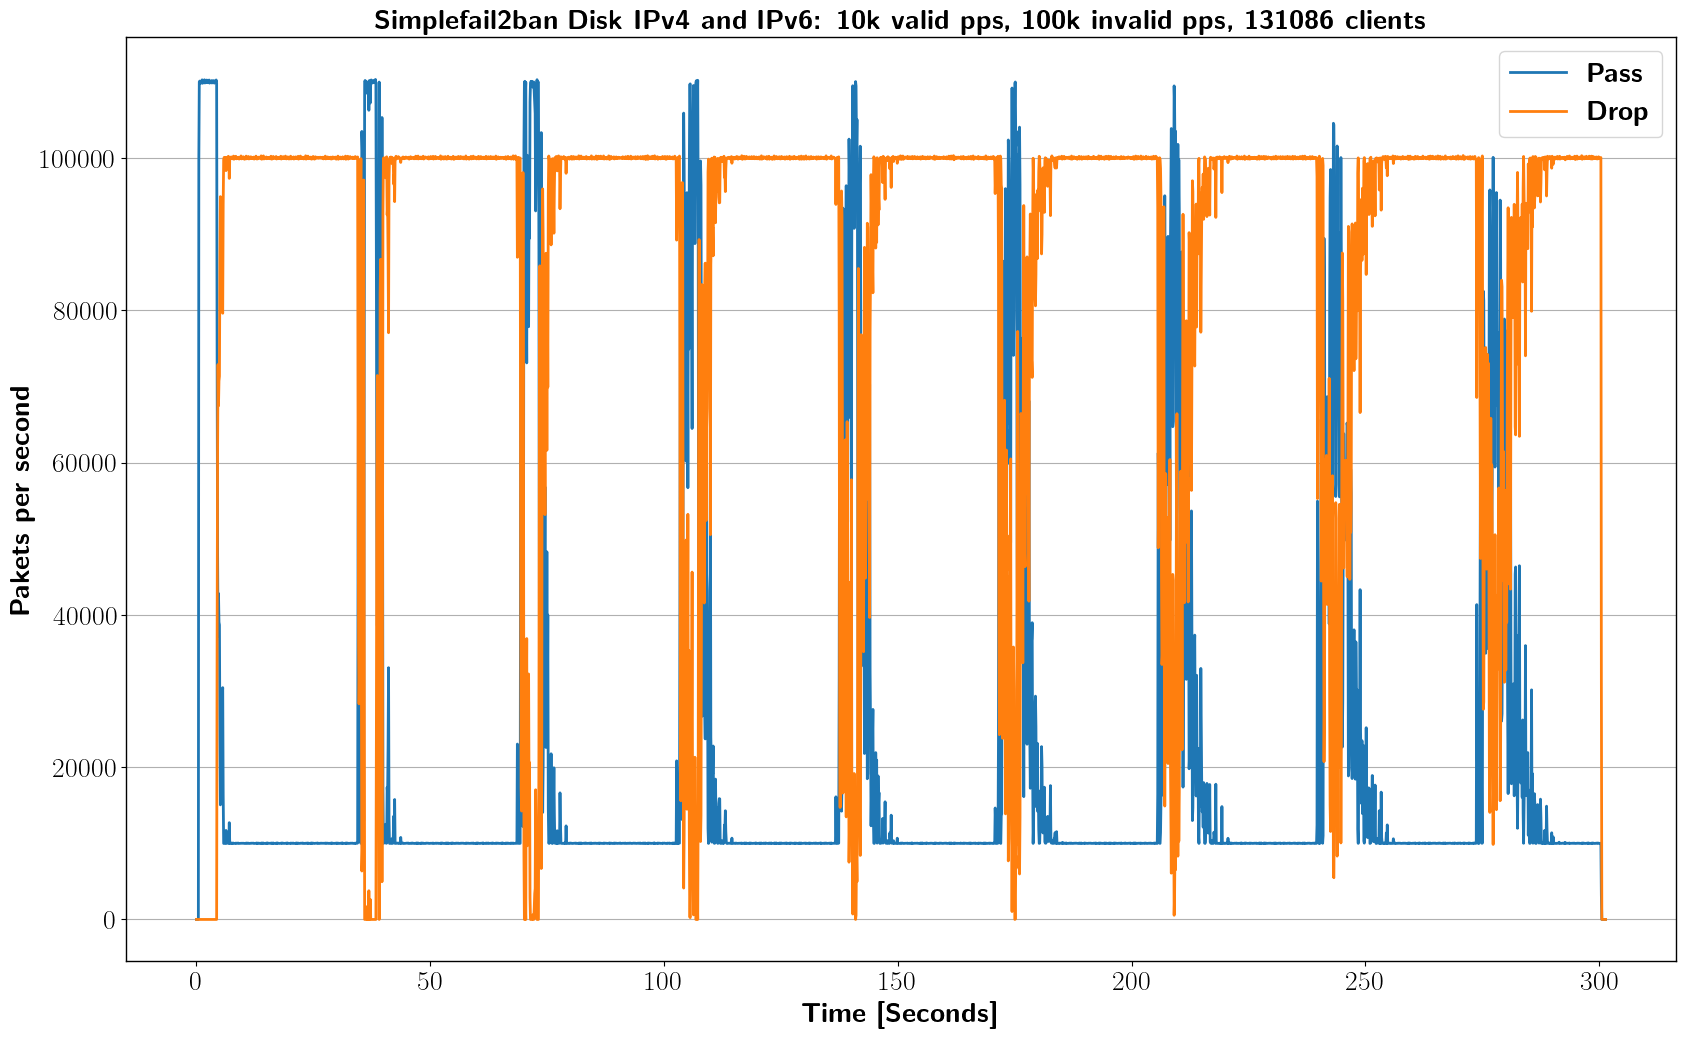

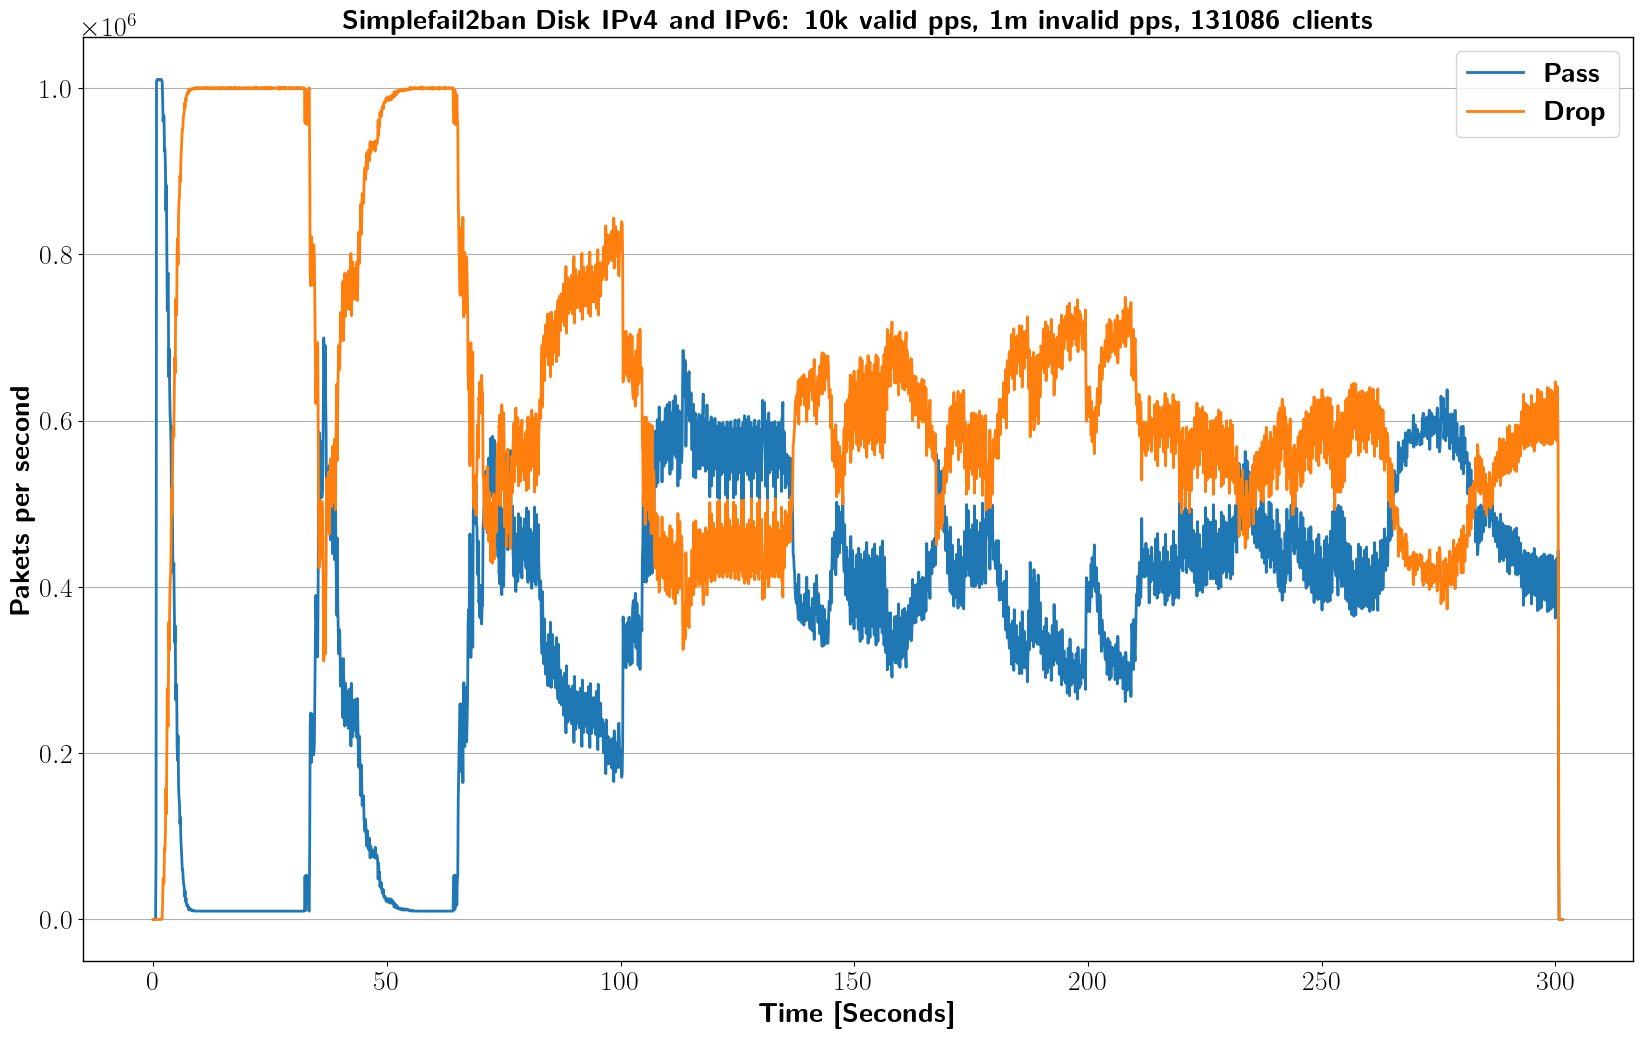

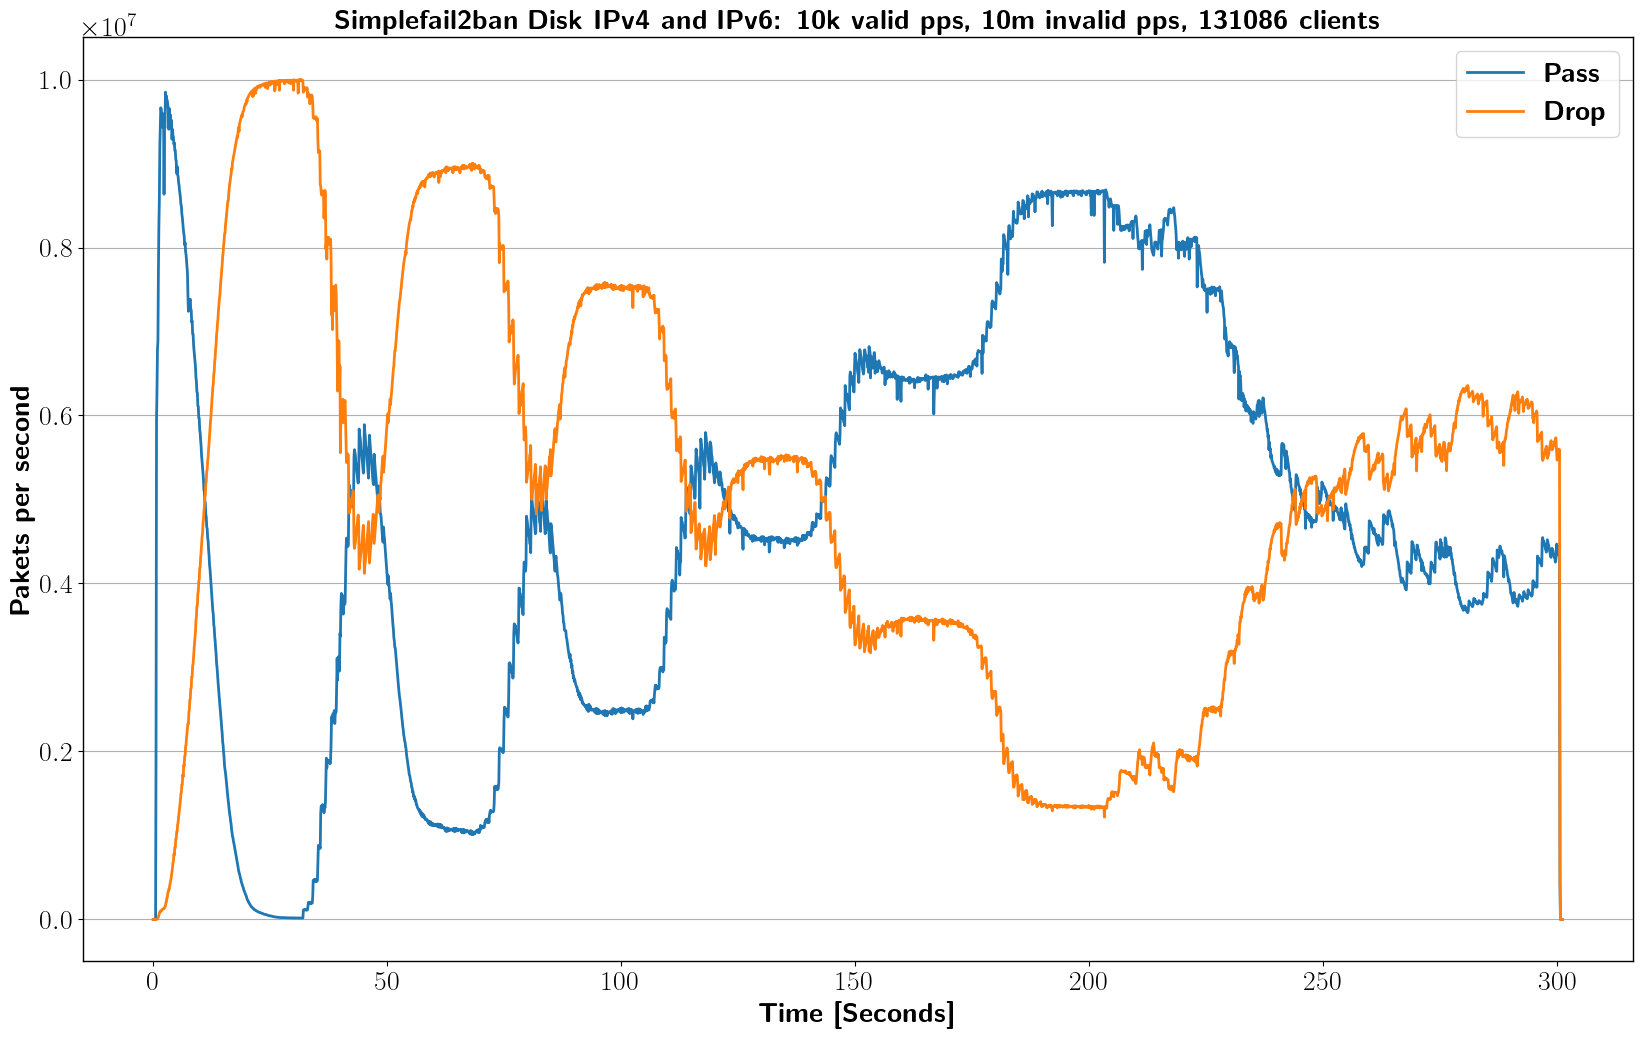

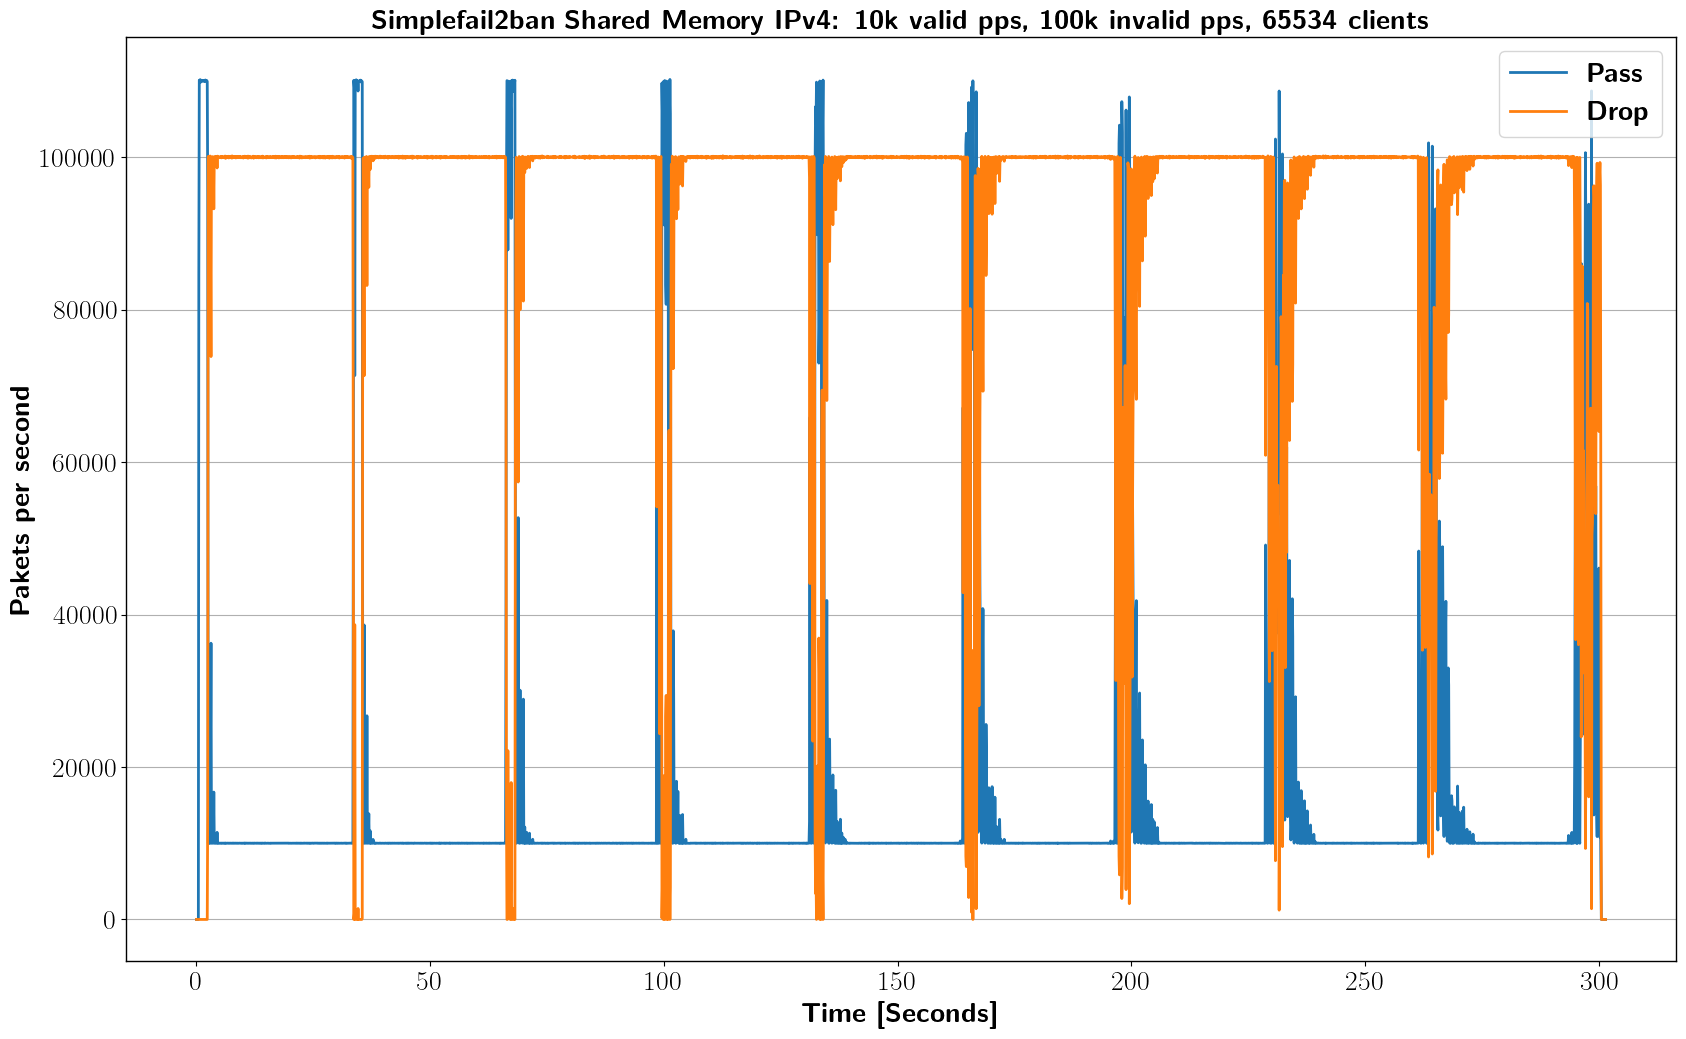

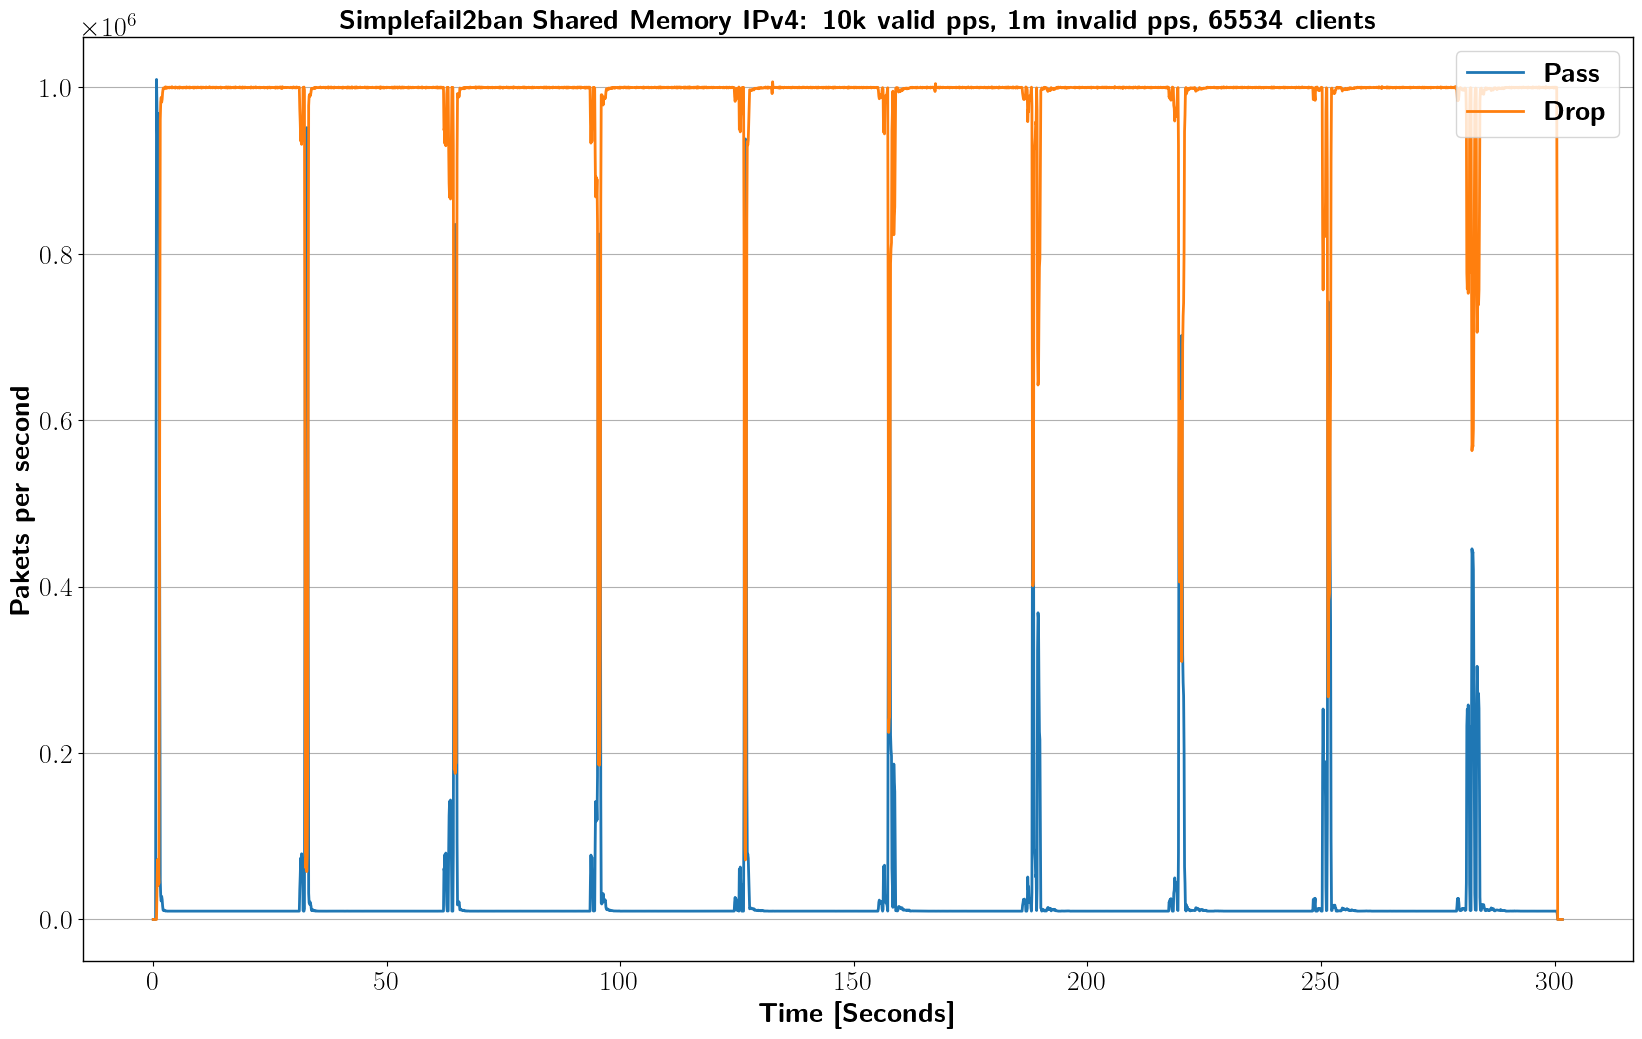

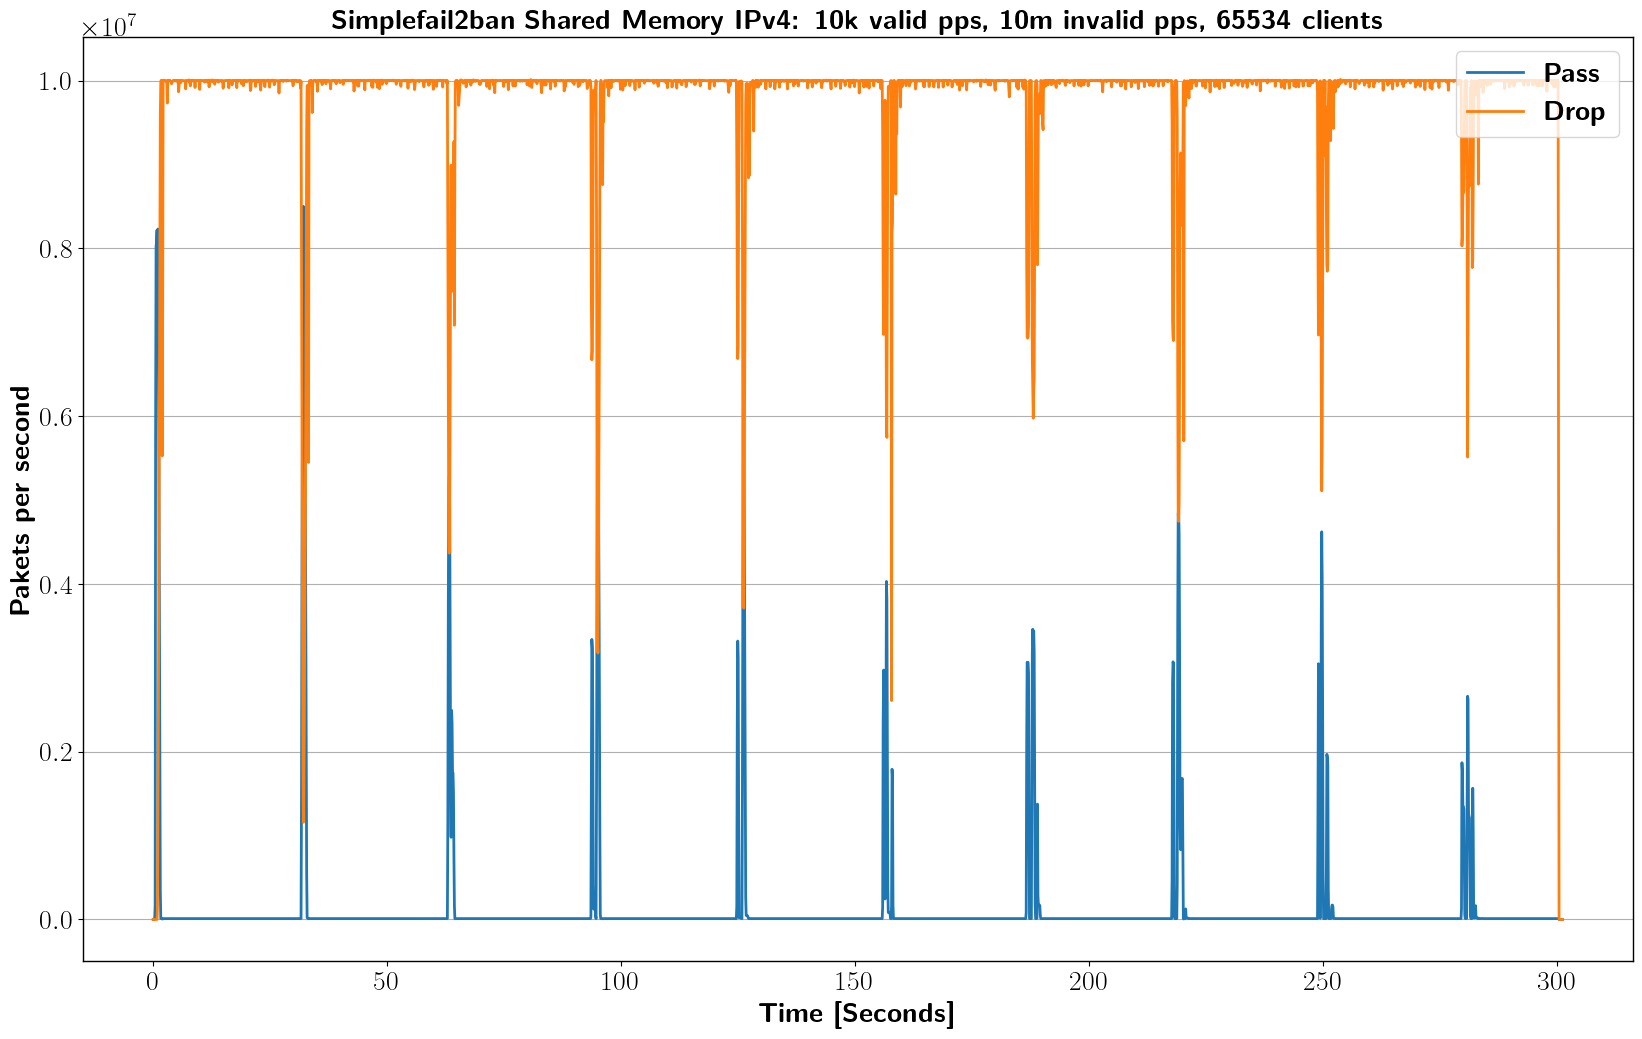

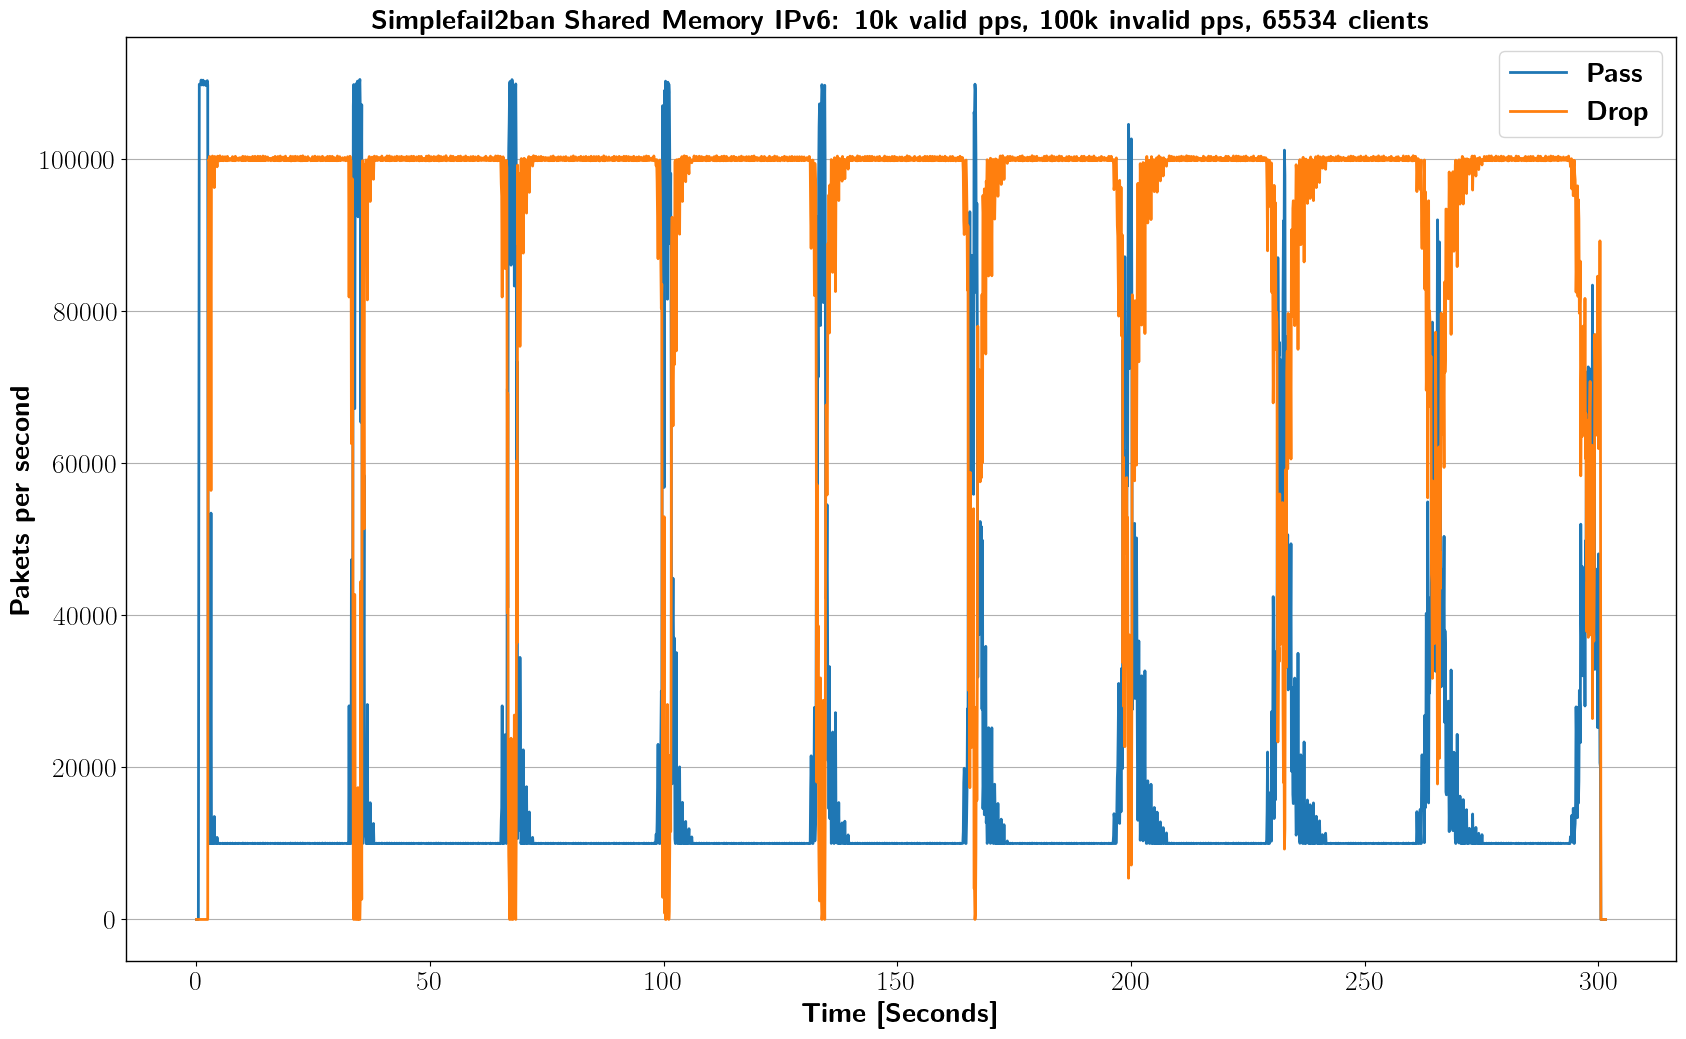

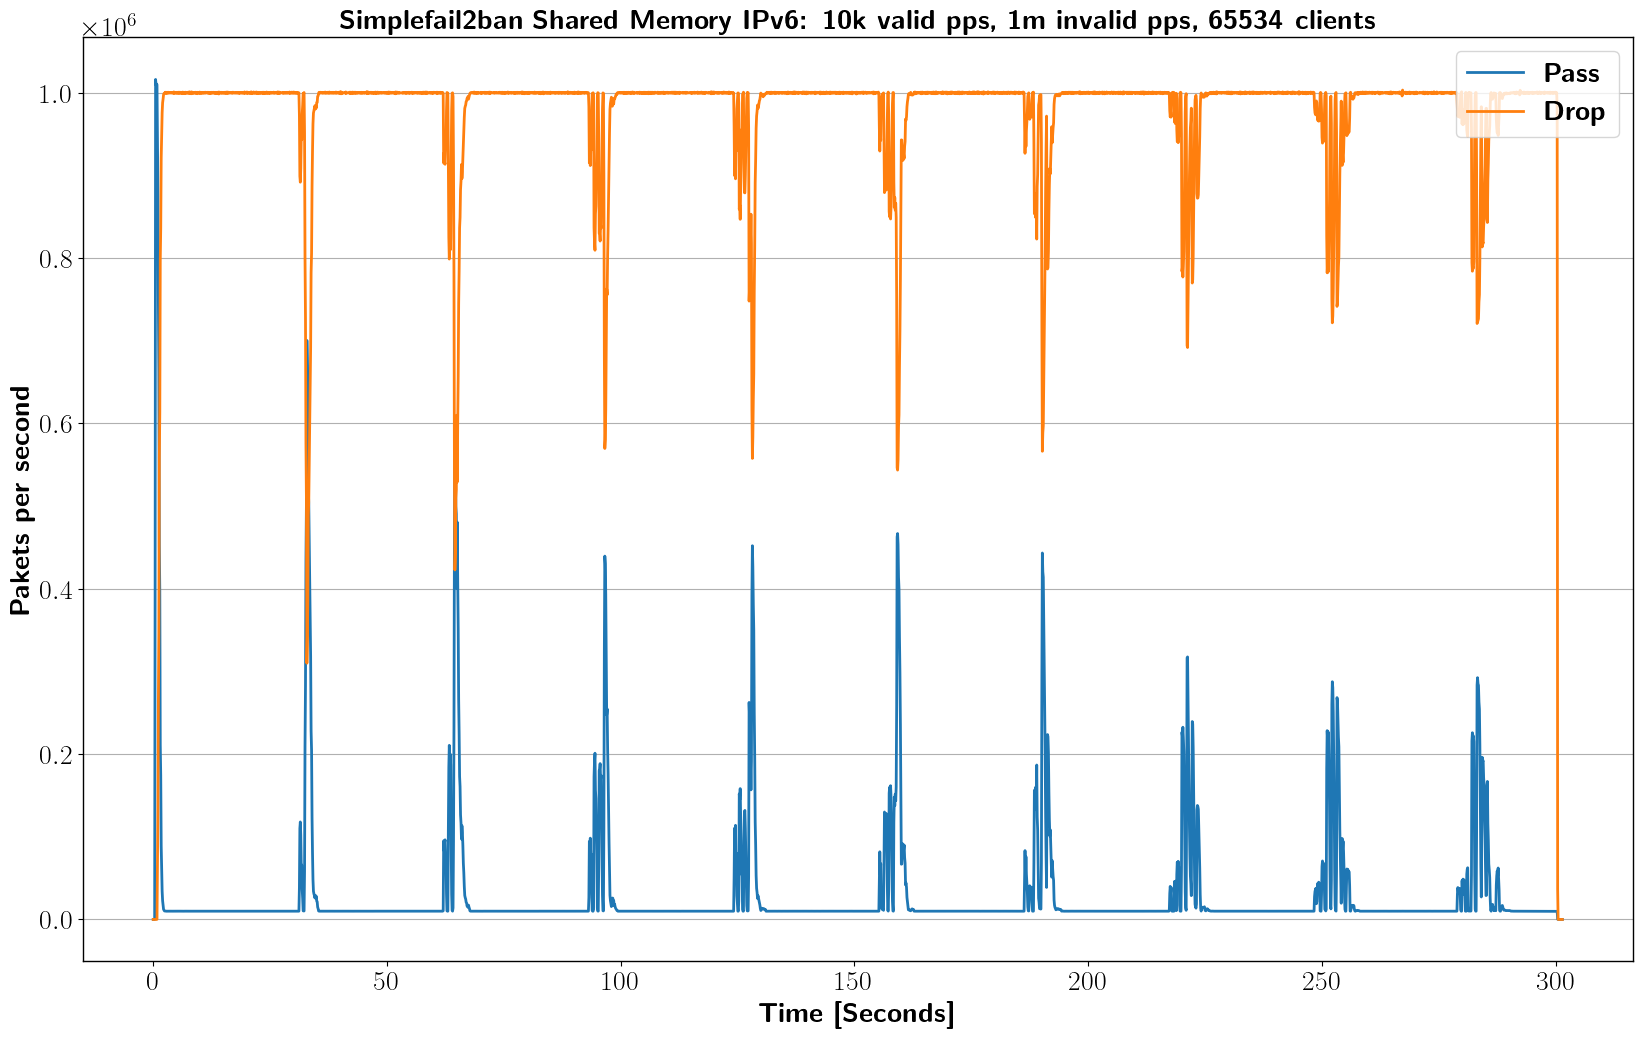

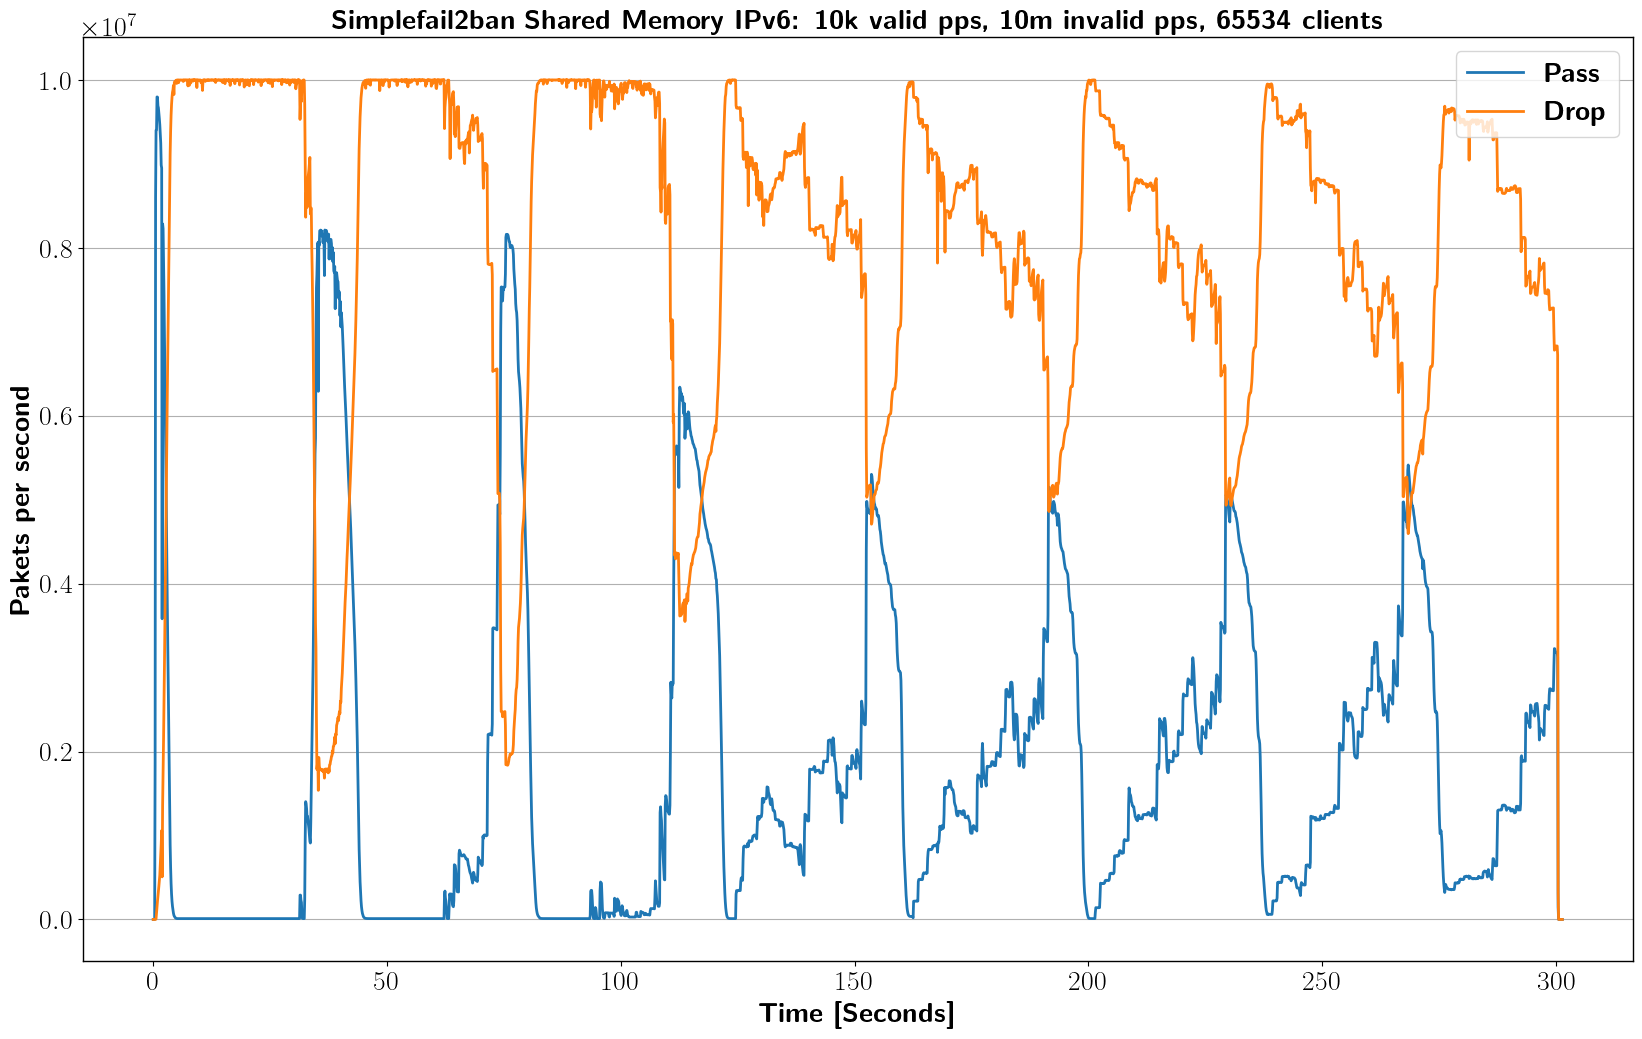

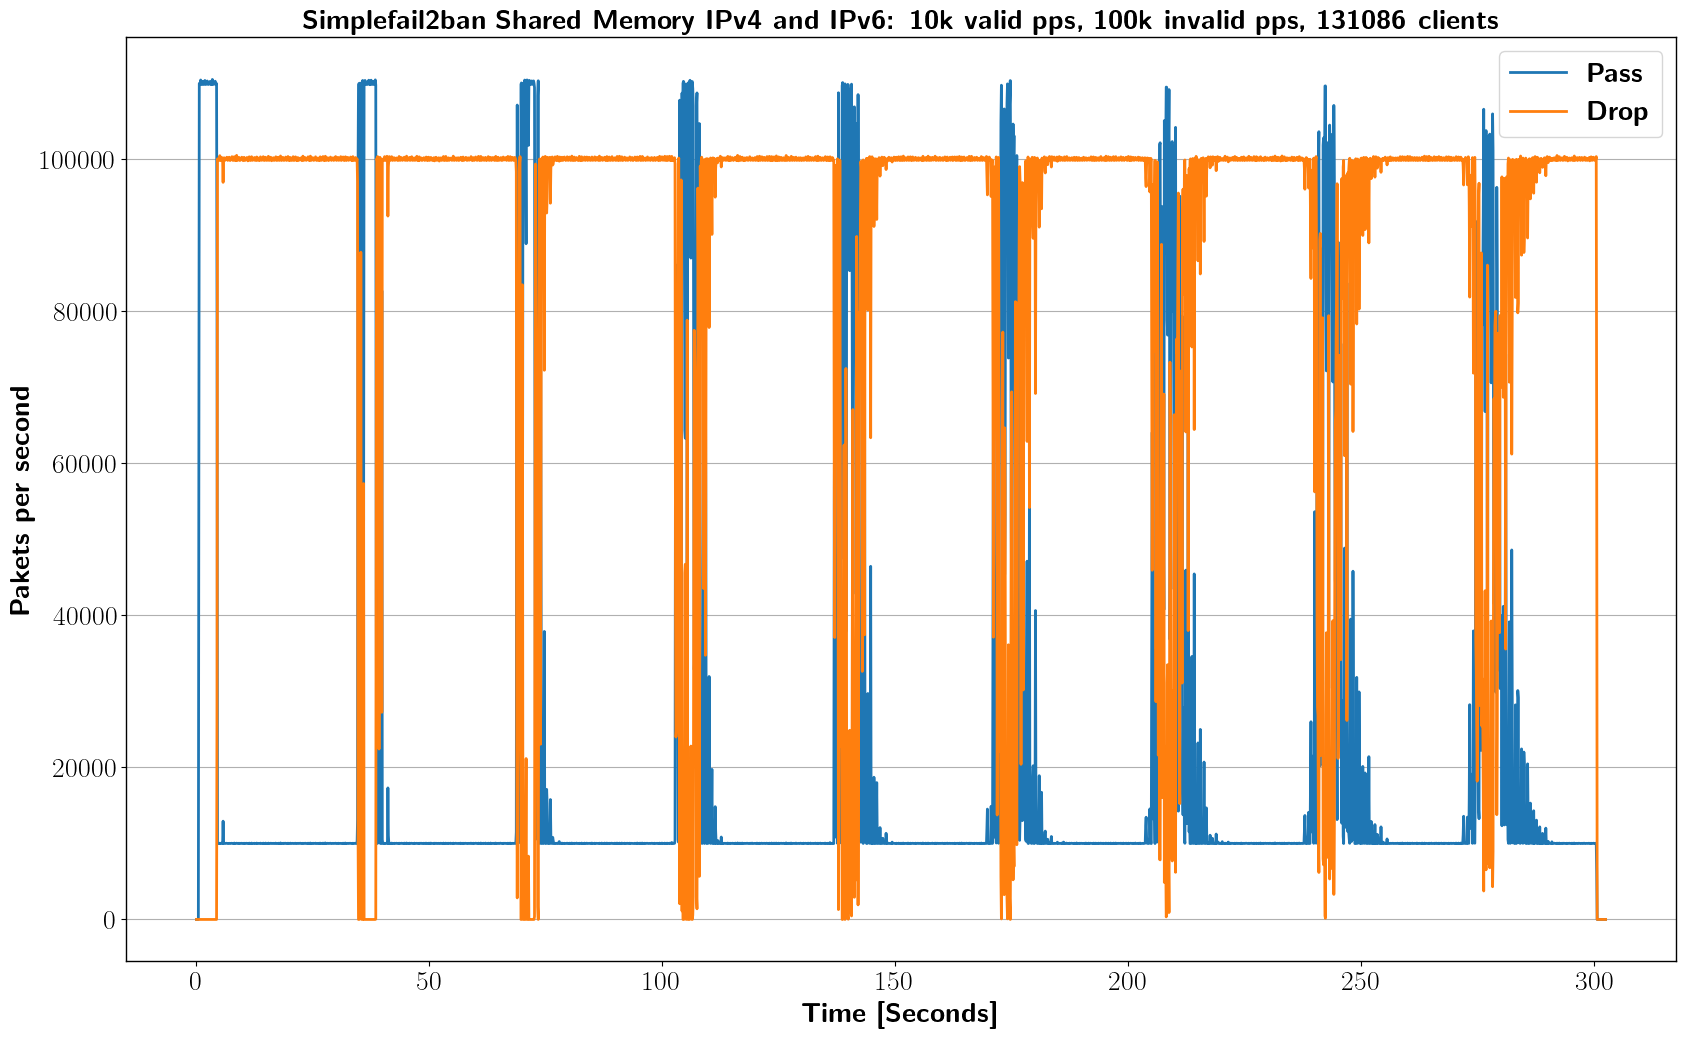

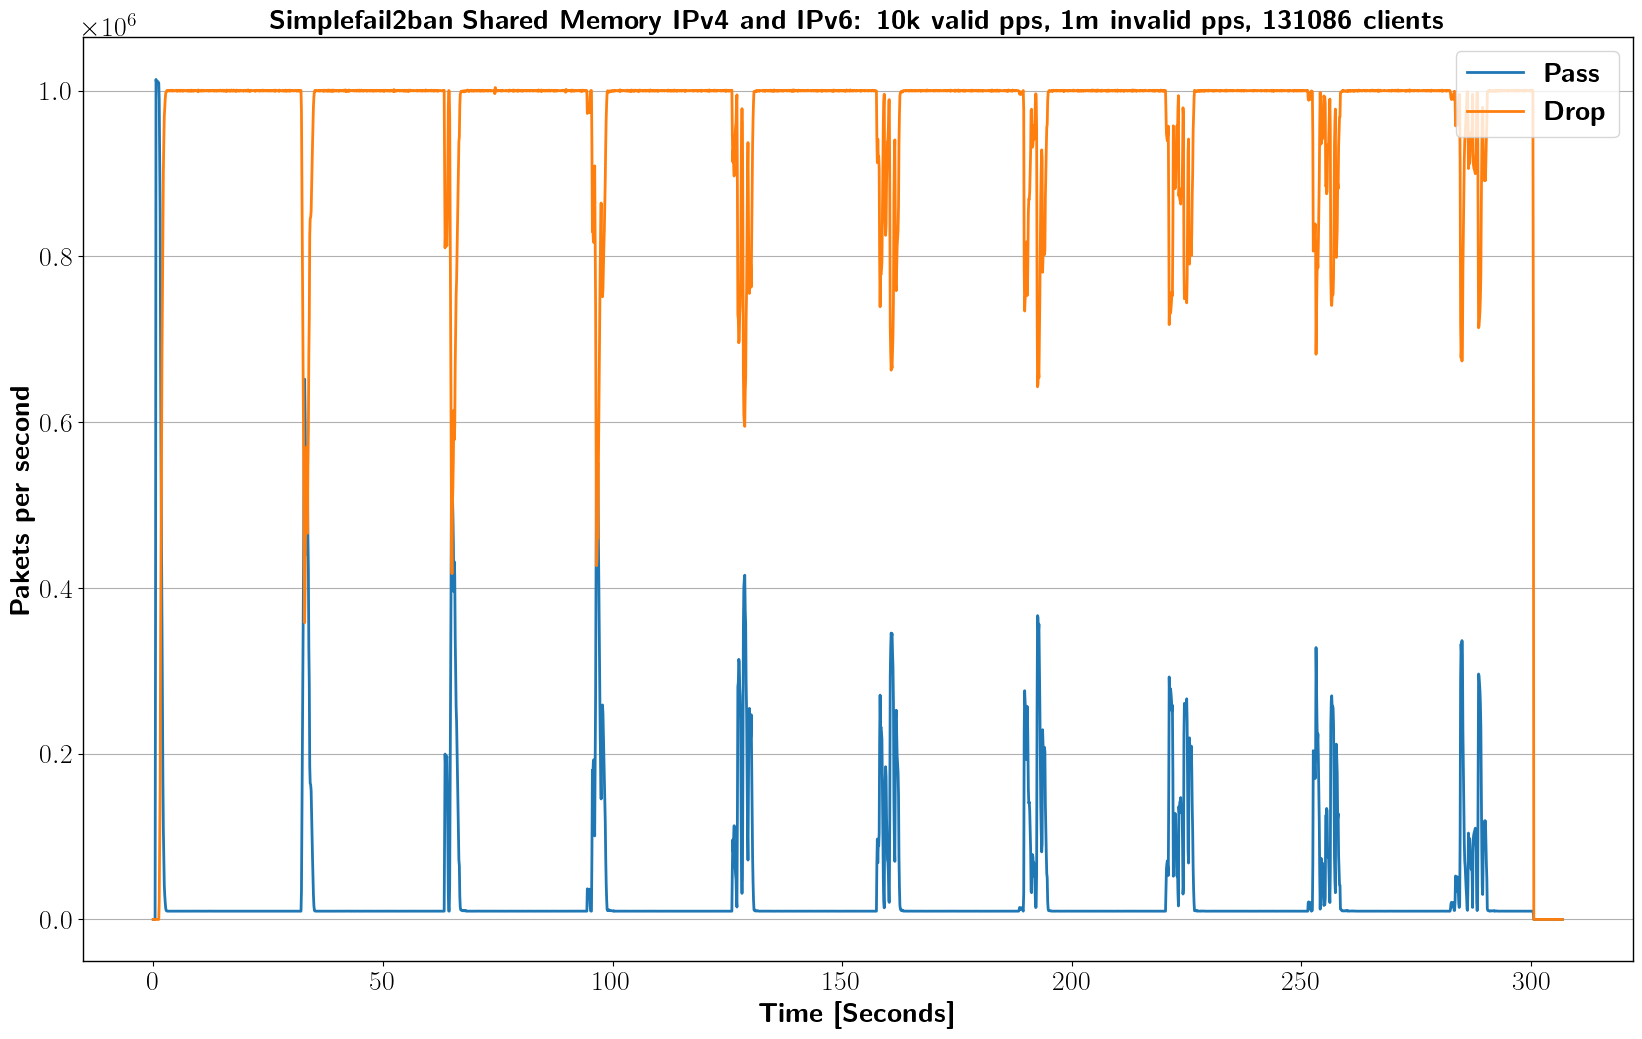

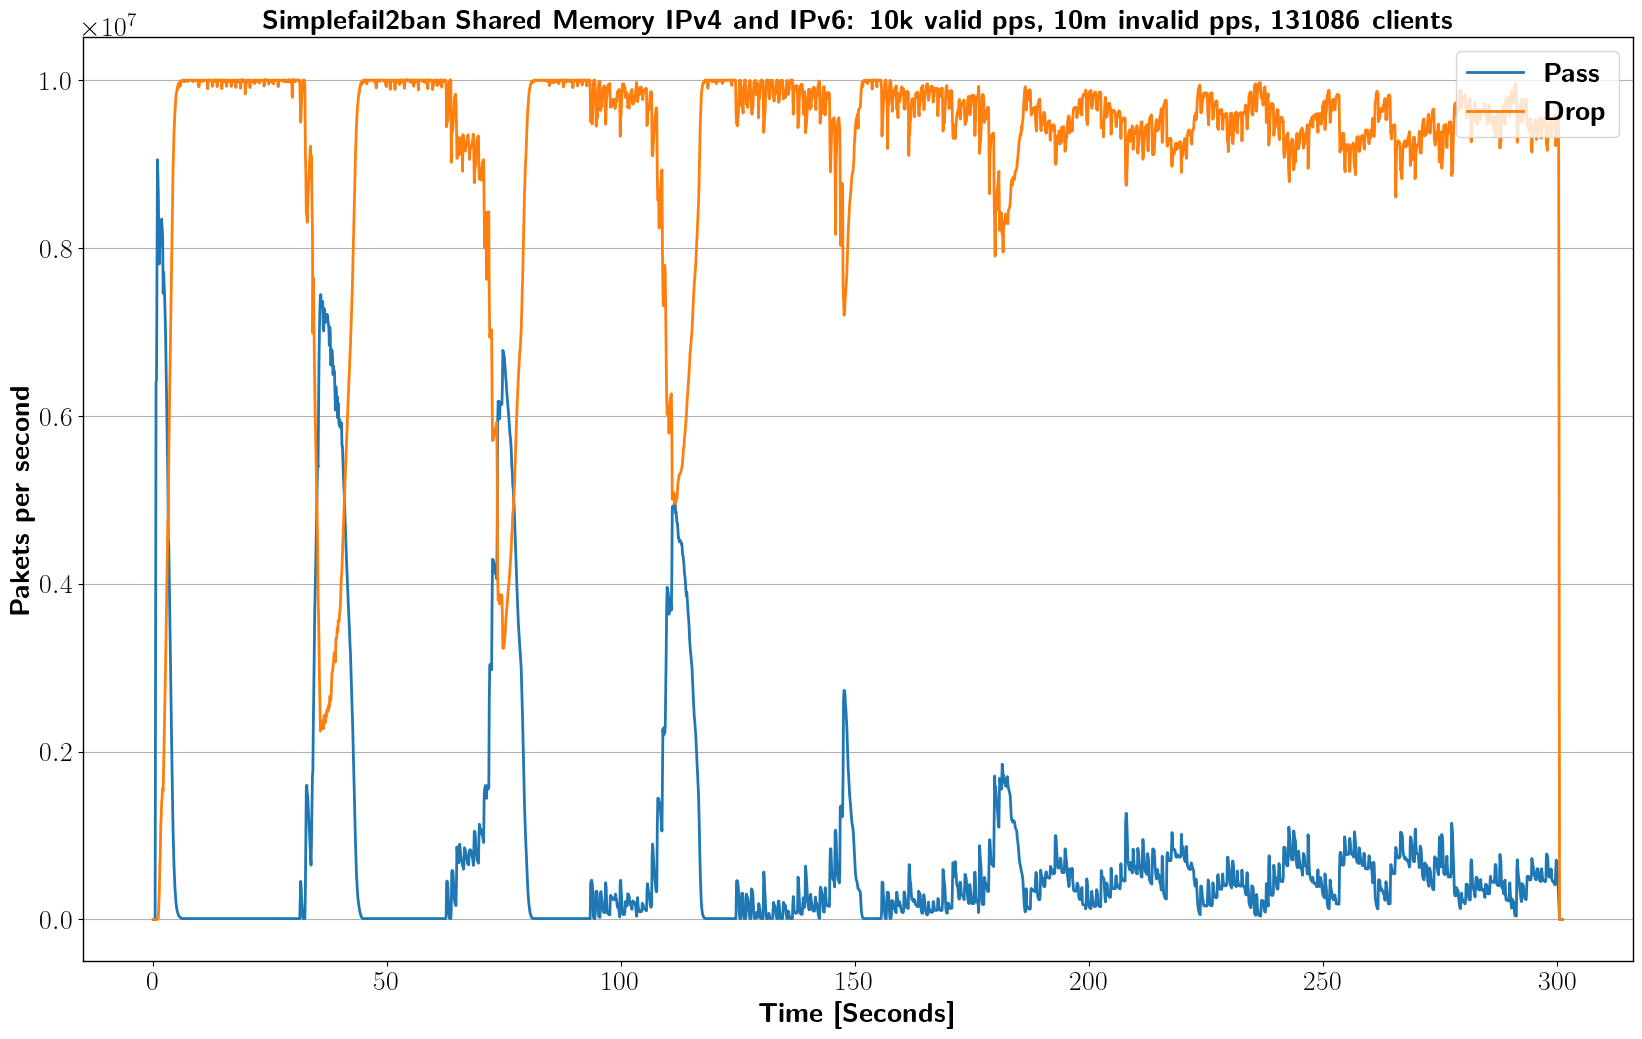

In [8]:
make_time_graph(paths_fail2ban)
make_time_graph(paths_simplefail2ban_disk)
make_time_graph(paths_simplefail2ban_shm)